In [2]:
from class_linking import NPLinker_classes
import numpy as np

In [4]:
# load local crusemann data
npl = NPLinker_classes({'dataset': {'root': '/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/'}})
npl.load_data()
npl.read_class_info()

11:20:29 [INFO] config.py:121, Loading from local data in directory /mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/
11:20:29 [WARNING] loader.py:48, WARNING: unable to find extra_nodes_file in path "/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/quantification_table_reformatted/*.csv"
11:20:29 [WARNING] loader.py:48, WARNING: unable to find metadata_table_file in path "/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/metadata_table/metadata_table*.txt"
11:20:29 [WARNING] loader.py:48, WARNING: unable to find quantification_table_file in path "/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/quantification_table/quantification_table*.csv"
11:20:29 [INFO] loader.py:82, Trying to discover correct bigscape directory under /mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/bigscape
11:20:29 [INFO] loader.py:85, Found network files direc

In [5]:
# Basic functionality
# ===================
#
# Once you have an NPLinker object with all data loaded, there are a collection of simple
# methods and properties you can use to access objects and metadata. Some examples are 
# given below, see https://nplinker.readthedocs.io/en/latest/ for a complete API description.

# configuration/dataset metadata
# - a copy of the configuration as parsed from the .toml file (dict)
print(npl.config) 
# - the path to the directory where various nplinker data files are located (e.g. the 
#   default configuration file template) (str)
print(npl.data_dir)
# - a dataset ID, derived from the path for local datasets or the paired platform ID
#   for datasets loaded from that source (str)
print(npl.dataset_id)
# - the root directory for the current dataset (str)
print(npl.root_dir)

# objects
# - you can directly access lists of each of the 4 object types:
print('BGCs:', len(npl.bgcs))
print('GCFs:', len(npl.gcfs)) # contains GCF objects
print('Spectra:', len(npl.spectra)) # contains Spectrum objects
print('Molecular Families:', len(npl.molfams)) # contains MolecularFamily objects

{'loglevel': 'INFO', 'logfile': '', 'log_to_stdout': True, 'repro_file': '', 'dataset': {'root': '/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/', 'overrides': {}, 'platform_id': ''}, 'antismash': {'antismash_format': 'default', 'ignore_spaces': False}, 'docker': {'run_bigscape': True, 'extra_bigscape_parameters': ''}, 'webapp': {'tables_metcalf_threshold': 2.0}, 'scoring': {'rosetta': {}}}
../../prototype/nplinker/data

/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/
BGCs: 5869
GCFs: 1581
Spectra: 13667
Molecular Families: 8346


In [6]:
mc = npl.scoring_method('metcalf')

# Now mc is an instance of the class that implements Metcalf scoring. Once
# you have such an instance, you may change any of the parameters it exposes.
# In the case of Metcalf scoring, the following parameters are currently exposed:
# - cutoff (float): the scoring threshold. Links with scores less than this are excluded
# - standardised (bool): set to True to use standardised scores (default), False for regular
mc.cutoff = 2.5
mc.standardised = True

results = npl.get_links(npl.gcfs, mc, and_mode=True)

# get_links returns an instance of a class called LinkCollection. This provides a wrapper
# around the results of the scoring operation and has various useful properties/methods:
#
# - len(results) or .source_count will tell you how many of the input_objects were found to have links
print('Number of results: {}'.format(len(results)))
# - .sources is a list of those objects
objects_with_links = results.sources
# - .links is a dict with structure {input_object: {linked_object: ObjectLink}} 
objects_and_link_info = results.links
# - .get_all_targets() will return a flat list of *all* the linked objects (for all sources)
all_targets = results.get_all_targets() 
# - .methods is a list of the scoring methods passed to get_links
methods = results.methods

11:23:24 [INFO] methods.py:436, MetcalfScoring.setup (bgcs=5869, gcfs=1581, spectra=13667, molfams=8346, strains=154)
11:23:34 [INFO] methods.py:476, MetcalfScoring.setup completed
Number of results: 1581


In [7]:
# example of a good score, (predicted) NRP linking to a (predicted) peptide like spectrum
npl.class_linking_score(list(npl.gcfs)[0], list(npl.spectra)[500])

[(0.7553763440860215,
  'mibig_classes',
  'cf_superclass',
  'NRP',
  'Organic acids and derivatives'),
 (0.6419354838709678,
  'as_classes',
  'cf_superclass',
  'NRPS',
  'Organic acids and derivatives'),
 (0.4583333333333333,
  'mibig_classes',
  'cf_subclass',
  'NRP',
  'Amino acids, peptides, and analogues'),
 (0.4435483870967742,
  'mibig_classes',
  'cf_class',
  'NRP',
  'Carboxylic acids and derivatives'),
 (0.3718861209964413,
  'as_classes',
  'cf_subclass',
  'NRPS',
  'Amino acids, peptides, and analogues'),
 (0.3403225806451613,
  'as_classes',
  'cf_class',
  'NRPS',
  'Carboxylic acids and derivatives'),
 (0.017241379310344827,
  'mibig_classes',
  'npc_superclass',
  'NRP',
  'Nucleosides'),
 (0.014466546112115732,
  'mibig_classes',
  'npc_pathway',
  'NRP',
  'Carbohydrates'),
 (0.008849557522123894, 'as_classes', 'npc_superclass', 'NRPS', 'Nucleosides'),
 (0.007352941176470588, 'as_classes', 'npc_pathway', 'NRPS', 'Carbohydrates'),
 (0, 'mibig_classes', 'npc_class

In [8]:
# example of a bad score, (predicted) NRP linking to an (predicted) alkaloid like spectrum
npl.class_linking_score(list(npl.gcfs)[0], list(npl.spectra)[0])

[(0.17902350813743217, 'mibig_classes', 'npc_pathway', 'NRP', 'Alkaloids'),
 (0.13655462184873948, 'as_classes', 'npc_pathway', 'NRPS', 'Alkaloids'),
 (0.03763440860215054, 'mibig_classes', 'cf_superclass', 'NRP', 'Benzenoids'),
 (0.03225806451612903,
  'mibig_classes',
  'cf_class',
  'NRP',
  'Benzene and substituted derivatives'),
 (0.02258064516129032, 'as_classes', 'cf_superclass', 'NRPS', 'Benzenoids'),
 (0.012903225806451613,
  'as_classes',
  'cf_class',
  'NRPS',
  'Benzene and substituted derivatives'),
 (0.0, 'mibig_classes', 'cf_subclass', 'NRP', 'Carboxylic acid derivatives'),
 (0.0, 'as_classes', 'cf_subclass', 'NRPS', 'Carboxylic acid derivatives')]

In [9]:
dir(npl.class_links), npl.class_links.chem_class_names, npl.canopus.spectra_classes_names

(['__class__',
  '__delattr__',
  '__dict__',
  '__dir__',
  '__doc__',
  '__eq__',
  '__format__',
  '__ge__',
  '__getattribute__',
  '__gt__',
  '__hash__',
  '__init__',
  '__init_subclass__',
  '__le__',
  '__lt__',
  '__module__',
  '__ne__',
  '__new__',
  '__reduce__',
  '__reduce_ex__',
  '__repr__',
  '__setattr__',
  '__sizeof__',
  '__str__',
  '__subclasshook__',
  '__weakref__',
  '_as_conversion',
  '_bgc_class_names',
  '_bigscape_mibig_conversion',
  '_chem_class_names',
  '_class_count_dict',
  '_class_links',
  '_class_links_counts',
  '_get_class_counts',
  '_get_scoring_tables',
  '_mibig_classes',
  '_mibig_classes_file',
  '_read_mibig_classes',
  'as_conversion',
  'bgc_class_names',
  'bigscape_mibig_conversion',
  'chem_class_names',
  'class_links',
  'class_links_counts',
  'convert_as_classes',
  'get_gcf_as_classes'],
 ['cf_kingdom',
  'cf_superclass',
  'cf_class',
  'cf_subclass',
  'cf_direct_parent',
  'npc_class',
  'npc_superclass',
  'npc_pathway',


In [ ]:
test_molfam = list(npl.molfams)[4]

dir(test_molfam)
print(test_molfam)
test_molfam.family, test_molfam.family_id, test_molfam.id, test_molfam.spectra[0].spectrum_id

In [17]:
for mfs in npl.molfams:
    print(mfs)

MolFam(family_id=201, spectra=9)
MolFam(family_id=327, spectra=17)
MolFam(family_id=2551, spectra=2)
MolFam(family_id=1354, spectra=13)
Singleton molecular family (id=4)
Singleton molecular family (id=5)
MolFam(family_id=901, spectra=3)
Singleton molecular family (id=7)
MolFam(family_id=74, spectra=38)
Singleton molecular family (id=9)
Singleton molecular family (id=10)
Singleton molecular family (id=11)
Singleton molecular family (id=12)
MolFam(family_id=1051, spectra=9)
MolFam(family_id=835, spectra=13)
Singleton molecular family (id=15)
Singleton molecular family (id=16)
Singleton molecular family (id=17)
Singleton molecular family (id=18)
Singleton molecular family (id=19)
Singleton molecular family (id=20)
Singleton molecular family (id=21)
Singleton molecular family (id=22)
Singleton molecular family (id=23)
MolFam(family_id=896, spectra=41)
MolFam(family_id=16, spectra=96)
Singleton molecular family (id=26)
Singleton molecular family (id=27)
Singleton molecular family (id=28)
Mo

Singleton molecular family (id=2821)
Singleton molecular family (id=2822)
Singleton molecular family (id=2823)
Singleton molecular family (id=2824)
Singleton molecular family (id=2825)
Singleton molecular family (id=2826)
Singleton molecular family (id=2827)
Singleton molecular family (id=2828)
Singleton molecular family (id=2829)
Singleton molecular family (id=2830)
Singleton molecular family (id=2831)
Singleton molecular family (id=2832)
Singleton molecular family (id=2833)
MolFam(family_id=1685, spectra=6)
Singleton molecular family (id=2835)
Singleton molecular family (id=2836)
Singleton molecular family (id=2837)
Singleton molecular family (id=2838)
Singleton molecular family (id=2839)
MolFam(family_id=2589, spectra=3)
Singleton molecular family (id=2841)
Singleton molecular family (id=2842)
Singleton molecular family (id=2843)
Singleton molecular family (id=2844)
MolFam(family_id=1477, spectra=10)
Singleton molecular family (id=2846)
Singleton molecular family (id=2847)
Singleton

Singleton molecular family (id=4620)
Singleton molecular family (id=4621)
Singleton molecular family (id=4622)
MolFam(family_id=668, spectra=2)
Singleton molecular family (id=4624)
Singleton molecular family (id=4625)
Singleton molecular family (id=4626)
MolFam(family_id=479, spectra=3)
Singleton molecular family (id=4628)
Singleton molecular family (id=4629)
Singleton molecular family (id=4630)
MolFam(family_id=378, spectra=3)
Singleton molecular family (id=4632)
Singleton molecular family (id=4633)
MolFam(family_id=1572, spectra=2)
Singleton molecular family (id=4635)
Singleton molecular family (id=4636)
Singleton molecular family (id=4637)
Singleton molecular family (id=4638)
Singleton molecular family (id=4639)
Singleton molecular family (id=4640)
Singleton molecular family (id=4641)
Singleton molecular family (id=4642)
MolFam(family_id=4081, spectra=2)
Singleton molecular family (id=4644)
Singleton molecular family (id=4645)
Singleton molecular family (id=4646)
Singleton molecular

Singleton molecular family (id=7459)
Singleton molecular family (id=7460)
Singleton molecular family (id=7461)
Singleton molecular family (id=7462)
Singleton molecular family (id=7463)
Singleton molecular family (id=7464)
Singleton molecular family (id=7465)
Singleton molecular family (id=7466)
Singleton molecular family (id=7467)
Singleton molecular family (id=7468)
Singleton molecular family (id=7469)
Singleton molecular family (id=7470)
Singleton molecular family (id=7471)
Singleton molecular family (id=7472)
MolFam(family_id=1995, spectra=3)
Singleton molecular family (id=7474)
Singleton molecular family (id=7475)
Singleton molecular family (id=7476)
Singleton molecular family (id=7477)
Singleton molecular family (id=7478)
Singleton molecular family (id=7479)
Singleton molecular family (id=7480)
Singleton molecular family (id=7481)
Singleton molecular family (id=7482)
Singleton molecular family (id=7483)
Singleton molecular family (id=7484)
Singleton molecular family (id=7485)
Sing

## Try to filter all the links and see how many remain

In [7]:
cs_cutoff = 0.25
from nplinker.nplinker import Spectrum

In [8]:
# try first only including gcf-spectrum links
# from nplinker.nplinker import Spectrum
# results.filter_targets(lambda spec: isinstance(spec, Spectrum))

In [9]:
# # The link data inside the LinkCollection object is itself stored in ObjectLink objects.
# # Each instance of an ObjectLink represents a link between a given pair of objects as
# # determined by 1 or more scoring methods. 
# #
# # ObjectLinks have the following basic attributes:
# # - .source: the input object provided to the method
# # - .target: the linked object
# # - .methods: a list of the methods that found this link
# # - .shared_strains: a list of Strain objects (possibly empty) shared between .source and .target
# # - .data(<method_object>): return the output of <method_object> for this link (e.g. any score values)
# # 
# # You can also retrieve any method-specific info for a link by subscripting these objects with 
# # the appropriate method object, e.g. metcalf_link_data = object_link[mc] 

# # This shows how to iterate over the link information from result.links. In the body of the loop
# # <obj> will be one of  the original objects supplied to get_links and <result> will be a dict 
# # with structure {linked_object: ObjectLink} (indicating <obj> is linked to <linked_object> according to
# # the information stored in the ObjectLink)
# i = 0
# for obj, result in results.links.items():
#     # display the object, the number of links it has, and the number of methods that were used to get them
#     print('Results for object: {}, {} total links, {} methods used'.format(obj, len(result), results.method_count))
    
#     # sorting is method-dependent since they might have very different "scores", so you should
#     # use the original object to do this. For Metcalf scoring, this will return the ObjectLinks sorted
#     # by their Metcalf scores. 
#     sorted_links = results.get_sorted_links(mc, obj)
#     # or if you wanted them in the reverse order:
#     # sorted_links = results.get_sorted_links(mc, obj, reverse=True)
    
#     # Now display some link information for each link associated with <obj>.
#     # link_data[<method_object>] will return the per-link data generated by that 
#     # method. Here the metcalf method simply returns the link score as a floating point value,
#     # but other methods may return more complex objects. 
#     # 
#     # Each scoring method also has a format_data method which should provide a relatively short 
#     # human-readable summary of the data, as a quick way to print and examine results. 
#     for link_data in sorted_links:
#         if isinstance(link_data.target, Spectrum):
#             print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
#                                                                     link_data.target, 
#                                                                     mc.format_data(link_data[mc]), 
#                                                                     len(link_data.shared_strains)))
        
#     # alternatively, if you don't care about ordering, you can just iterate directly over the 
#     # linked objects like this:
#     # for link_target, link_data in result.items():
#     #    print(link_target, link_data)
#     if i == 2:
#         break
#     i += 1

In [10]:
obj = npl.gcfs[504]
result = results.links[obj]
print('Results for object: {}, {} total links, {} methods used'.format(obj, len(result), results.method_count))
sorted_links = results.get_sorted_links(mc, obj)
num_links = 0
num_filtered_links = 0
no_scores = 0
for link_data in sorted_links:
        if isinstance(link_data.target, Spectrum):
            num_links += 1
#             print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
#                                                                     link_data.target, 
#                                                                     mc.format_data(link_data[mc]), 
#                                                                     len(link_data.shared_strains)))
            cl_score = npl.class_linking_score(obj, link_data.target)
            if cl_score:
                if cl_score[0][0] > cs_cutoff:
                    num_filtered_links += 1
                    print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
                                                                        link_data.target, 
                                                                        mc.format_data(link_data[mc]), 
                                                                        len(link_data.shared_strains)))
                    print(cl_score[0])
            else:
                no_scores += 1
print("Number of links:", num_links)
print("Number of filtered links:", num_filtered_links + no_scores, f"of which {no_scores} without linking score")

Results for object: GCF(id=504, class=Others, gcf_id=301, strains=1), 319 total links, 1 methods used
  --> [metcalf] Spectrum(id=3167, spectrum_id=82943, strains=2) | 8.7178 | shared strains = 1
(0.47073170731707314, 'mibig_classes', 'npc_pathway', 'Other', 'Alkaloids')
  --> [metcalf] Spectrum(id=3909, spectrum_id=93578, strains=2) | 8.7178 | shared strains = 1
(0.47073170731707314, 'mibig_classes', 'npc_pathway', 'Other', 'Alkaloids')
  --> [metcalf] Spectrum(id=8039, spectrum_id=151423, strains=2) | 8.7178 | shared strains = 1
(0.4691358024691358, 'as_classes', 'cf_superclass', 'other', 'Organoheterocyclic compounds')
  --> [metcalf] Spectrum(id=8040, spectrum_id=151424, strains=2) | 8.7178 | shared strains = 1
(0.4691358024691358, 'as_classes', 'cf_superclass', 'other', 'Organoheterocyclic compounds')
  --> [metcalf] Spectrum(id=9891, spectrum_id=179938, strains=2) | 8.7178 | shared strains = 1
(0.4691358024691358, 'as_classes', 'cf_superclass', 'other', 'Organoheterocyclic compou

In [11]:
# The link data inside the LinkCollection object is itself stored in ObjectLink objects.
# Each instance of an ObjectLink represents a link between a given pair of objects as
# determined by 1 or more scoring methods. 
#
# ObjectLinks have the following basic attributes:
# - .source: the input object provided to the method
# - .target: the linked object
# - .methods: a list of the methods that found this link
# - .shared_strains: a list of Strain objects (possibly empty) shared between .source and .target
# - .data(<method_object>): return the output of <method_object> for this link (e.g. any score values)
# 
# You can also retrieve any method-specific info for a link by subscripting these objects with 
# the appropriate method object, e.g. metcalf_link_data = object_link[mc] 

# This shows how to iterate over the link information from result.links. In the body of the loop
# <obj> will be one of  the original objects supplied to get_links and <result> will be a dict 
# with structure {linked_object: ObjectLink} (indicating <obj> is linked to <linked_object> according to
# the information stored in the ObjectLink)
# i = 0
all_num_links = []
all_num_filtered_links = []
all_no_scores = []
filt_cl_scores = []
zero_scores = []
# loop through links for all gcfs
for obj, result in results.links.items():
#     print(i)
    sorted_links = results.get_sorted_links(mc, obj)
    num_links = 0
    num_filtered_links = 0
    no_scores = 0
    # for each gcf, loop through link
    for link_data in sorted_links:
            if isinstance(link_data.target, Spectrum):
                num_links += 1
    #             print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
    #                                                                     link_data.target, 
    #                                                                     mc.format_data(link_data[mc]), 
    #                                                                     len(link_data.shared_strains)))
                cl_score = npl.class_linking_score(obj, link_data.target)
                # cl_score = npl....
                if cl_score:
                    if cl_score[0][0] > cs_cutoff:
                        num_filtered_links += 1
#                         print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
#                                                                             link_data.target, 
#                                                                             mc.format_data(link_data[mc]), 
#                                                                             len(link_data.shared_strains)))
                    else:
                        filt_cl_scores.append(cl_score)
                        for elem in cl_score:
                            if elem[0] == 0:
                                zero_scores.append((elem, obj, link_data.target))
                else:
                    no_scores += 1
    all_num_links.append(num_links)
    all_num_filtered_links.append(num_filtered_links)
    all_no_scores.append(no_scores)
#     print("Number of links:", num_links)
#     print("Number of filtered links:", num_filtered_links + no_scores, f"of which {no_scores} without linking score")

In [12]:
# gradient of class linking score cutoff

cs_cutoffs = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
d_all_num_links = []
d_all_num_filtered_links = {cut: [] for cut in cs_cutoffs}
d_all_no_scores = []

# loop through links for all gcfs
for obj, result in results.links.items():
#     print(i)
    sorted_links = results.get_sorted_links(mc, obj)
    num_links = 0
    num_filtered_links = [0 for _ in range(len(cs_cutoffs))]
    no_scores = 0
    # for each gcf, loop through link
    for link_data in sorted_links:
            if isinstance(link_data.target, Spectrum):
                num_links += 1
                
                cl_score = npl.class_linking_score(obj, link_data.target)
                
                if cl_score:
                    for j, cs_cut in enumerate(cs_cutoffs):
                        if cl_score[0][0] > cs_cut:
                            num_filtered_links[j] += 1

                else:
                    no_scores += 1
    d_all_num_links.append(num_links)
    for k, cs_cut in enumerate(cs_cutoffs):
        d_all_num_filtered_links[cs_cut].append(num_filtered_links[k])
    d_all_no_scores.append(no_scores)

In [13]:
print(f'Mean links per GCF: {np.mean(d_all_num_links):.2f}')
print(f'Mean links without class linking score per GCF: {np.mean(d_all_no_scores):.2f}\n')
cut = 15
print(f'Class linking cutoff\tMean filtered links per GCF\t%GCFs with <{cut} links')
for cs_cut, values in sorted(d_all_num_filtered_links.items()):
    print(f'{cs_cut}\t{np.mean(values):.2f}\t{len([1 for v in values if v < cut])/len(d_all_num_links)*100:.2f}')

Mean links per GCF: 549.85
Mean links without class linking score per GCF: 223.70

Class linking cutoff	Mean filtered links per GCF	%GCFs with <15 links
0.125	230.85	3.35
0.25	128.45	15.56
0.375	113.60	19.61
0.5	86.72	42.44
0.625	77.73	45.54
0.75	55.61	54.65
0.875	22.12	81.02


In [14]:
just_scores = list(zip(*[fcl2 for fcl1 in filt_cl_scores for fcl2 in fcl1]))[0]
len([sc for sc in just_scores if sc==0])

1282162

In [15]:
filt_cl_scores[:10]

[[(0.2302158273381295, 'as_classes', 'npc_pathway', 'NRPS-like', 'Alkaloids'),
  (0.17902350813743217, 'mibig_classes', 'npc_pathway', 'NRP', 'Alkaloids'),
  (0.13655462184873948, 'as_classes', 'npc_pathway', 'NRPS', 'Alkaloids'),
  (0.13655462184873948, 'as_classes', 'npc_pathway', 'NRPS', 'Alkaloids'),
  (0.0, 'mibig_classes', 'cf_superclass', 'NRP', 'Hydrocarbon derivatives'),
  (0, 'mibig_classes', 'cf_class', 'NRP', 'Organic oxides'),
  (0.0, 'as_classes', 'cf_superclass', 'NRPS-like', 'Hydrocarbon derivatives'),
  (0.0, 'as_classes', 'cf_superclass', 'NRPS', 'Hydrocarbon derivatives'),
  (0.0, 'as_classes', 'cf_superclass', 'NRPS', 'Hydrocarbon derivatives'),
  (0, 'as_classes', 'cf_class', 'NRPS-like', 'Organic oxides'),
  (0, 'as_classes', 'cf_class', 'NRPS', 'Organic oxides'),
  (0, 'as_classes', 'cf_class', 'NRPS', 'Organic oxides')],
 [(0.09734513274336283,
   'as_classes',
   'cf_superclass',
   'NRPS-like',
   'Lipids and lipid-like molecules'),
  (0.05309734513274336,
   

In [16]:
assert len(all_num_links) == len(all_num_filtered_links)
assert len(all_num_filtered_links)==len(all_no_scores)

In [17]:
import numpy as np
print(len(all_num_links))
np.mean(all_num_links), np.mean(all_num_filtered_links), np.mean(all_no_scores), max(all_num_links), max(all_num_filtered_links), max(all_no_scores)

1581


(549.8481973434535, 128.4459203036053, 223.7020872865275, 2971, 1243, 1306)

In [18]:
# add no scores and all_num_filtered_links
all_filt_links = [filt + nosc for filt, nosc in zip(all_num_filtered_links, all_no_scores)]

In [19]:
np.mean(all_num_links), np.mean(all_filt_links), max(all_num_links), max(all_filt_links)

(549.8481973434535, 352.1480075901328, 2971, 2470)

In [20]:
are0 = len([filt_link for filt_link in all_num_links if filt_link == 0])
are1_10 = len([filt_link for filt_link in all_num_links if filt_link > 0 and filt_link < 25])
print("Num filt + no scores links that are 0", are0)
print("Num filt + no scores links that are between 1-10", are1_10)

Num filt + no scores links that are 0 0
Num filt + no scores links that are between 1-10 42


In [21]:
up = 26
low = 0
before = all_num_links
# after = all_num_filtered_links
after = all_filt_links
before_range = len([filt_link for filt_link in before if filt_link > low and filt_link < up])
after_range = len([filt_link for filt_link in after if filt_link > low and filt_link < up])
before_range, after_range

(42, 104)

In [22]:
npl.class_links.class_links["mibig_classes"]["npc_pathway"]

,Polyketide,Other,Saccharide,Terpene,PKS-NRP_Hybrids,NRP,RiPP
Polyketides,0.759,0.088,0.457,0.091,0.400,0.208,0.034
Shikimates and Phenylpropanoids,0.028,0.051,0.021,0.005,0.014,0.016,0.000
Alkaloids,0.100,0.471,0.000,0.236,0.131,0.179,0.017
Amino acids and Peptides,0.033,0.220,0.064,0.010,0.422,0.579,0.950
Terpenoids,0.048,0.012,0.029,0.654,0.005,0.000,0.000
Fatty acids,0.019,0.046,0.000,0.000,0.027,0.004,0.000
Carbohydrates,0.012,0.112,0.429,0.005,0.002,0.014,0.000


In [23]:
import matplotlib.pyplot as plt

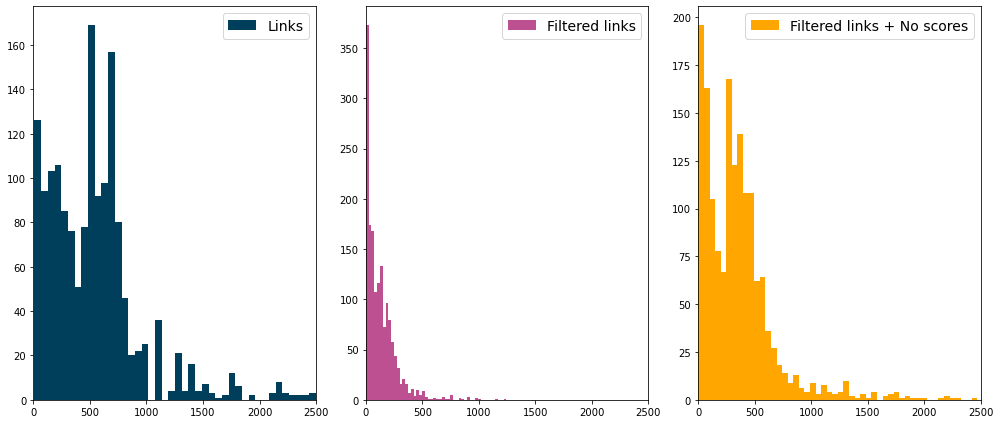

In [24]:
labels = ["Links", "Filtered links", "Filtered links + No scores"]
colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [all_num_links, all_num_filtered_links, all_filt_links]
lg_size = 14
custom_xlim = (-1, 2500)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
(ax0, ax1, ax2) = ax

ax0.hist(xs[0], bins=50, histtype='bar', stacked=True, label=labels[0], color=colours[0])
ax0.legend(prop={'size': lg_size})
ax1.hist(xs[1], bins=50, histtype='bar', stacked=True, label=labels[1], color=colours[1])
ax1.legend(prop={'size': lg_size})
ax2.hist(xs[2], bins=50, histtype='bar', stacked=True, label=labels[2], color=colours[2])
ax2.legend(prop={'size': lg_size})

plt.setp(ax, xlim=custom_xlim)
fig.tight_layout()
plt.show()

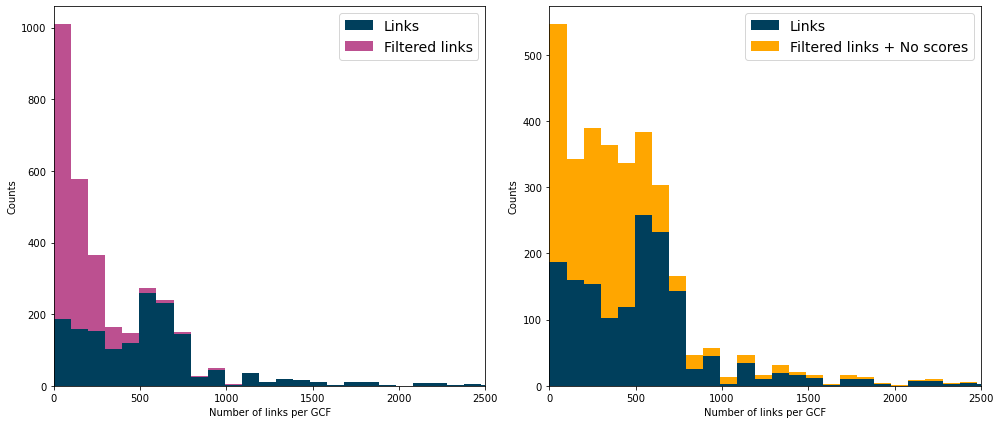

In [25]:
labels = ["Links", "Filtered links", "Filtered links + No scores"]
colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [all_num_links, all_num_filtered_links, all_filt_links]
# x1 = [all_num_links, all_num_filtered_links]
# x2 = [all_num_links, all_filt_links]
lg_size = 14
custom_xlim = (-1, 2500)
n_bins = 30
links_title = "Number of links per GCF"
count_title = "Counts"

# plt.hist(xs, bins=50, density=True, histtype='bar', stacked=True, label=labels, color=colours)
# plt.legend(prop={'size': lg_size})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
(ax0, ax1) = ax

ax0.hist(xs[:2], bins=n_bins, density=False, histtype='bar', stacked=True, label=labels[:2], color=colours[:2])
ax0.legend(prop={'size': lg_size})
ax1.hist([xs[0], xs[2]], bins=n_bins, density=False, histtype='bar', stacked=True, label=[labels[0], labels[2]],
         color=[colours[0], colours[2]])
ax1.legend(prop={'size': lg_size})
# ax2.hist(x[2], bins=50, density=True, histtype='bar', stacked=True, label=labels[2], color=colours[2])
# ax2.legend(prop={'size': lg_size})

plt.setp(ax, xlim=custom_xlim, xlabel=links_title, ylabel=count_title)
fig.tight_layout()
plt.show()

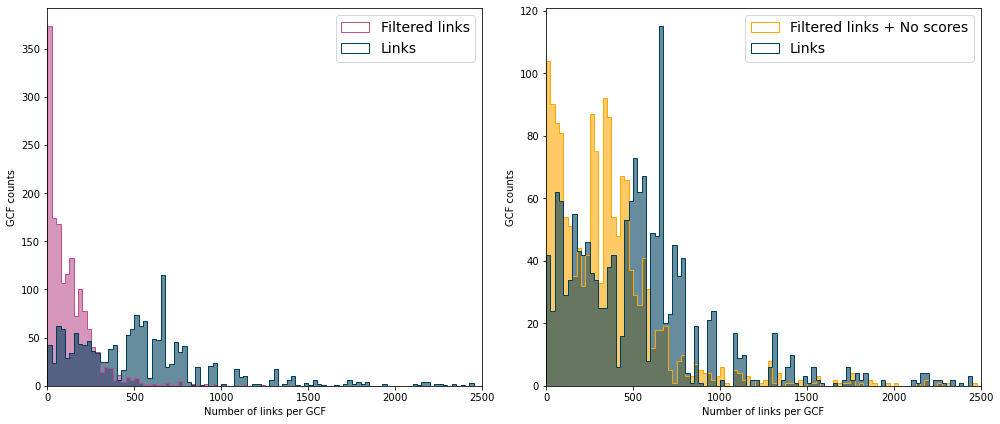

In [26]:
labels = ["Links", "Filtered links", "Filtered links + No scores"]
colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [all_num_links, all_num_filtered_links, all_filt_links]
# x1 = [all_num_links, all_num_filtered_links]
# x2 = [all_num_links, all_filt_links]
lg_size = 14
custom_xlim = (-1, 2500)
bin_size = 25
n_bins = np.arange(0, 2500, bin_size)
links_title = "Number of links per GCF"
count_title = "GCF counts"
hist_type = "stepfilled"
alpha = 0.6

# plt.hist(xs, bins=50, density=True, histtype='bar', stacked=True, label=labels, color=colours)
# plt.legend(prop={'size': lg_size})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
(ax0, ax1) = ax

ax0.hist(xs[:2], bins=n_bins, density=False, histtype='step', stacked=False, label=labels[:2], color=colours[:2])
ax0.legend(prop={'size': lg_size})
ax0.hist(xs[:2], bins=n_bins, density=False, histtype=hist_type, stacked=False, label=labels[:2], color=colours[:2],
         alpha=alpha)
ax1.hist([xs[0], xs[2]], bins=n_bins, density=False, histtype='step', stacked=False, label=[labels[0], labels[2]],
         color=[colours[0], colours[2]])
ax1.legend(prop={'size': lg_size})
ax1.hist([xs[0], xs[2]], bins=n_bins, density=False, histtype=hist_type, stacked=False, label=[labels[0], labels[2]],
         color=[colours[0], colours[2]], alpha=alpha)
# ax2.hist(x[2], bins=50, density=True, histtype='bar', stacked=True, label=labels[2], color=colours[2])
# ax2.legend(prop={'size': lg_size})

plt.setp(ax, xlim=custom_xlim, xlabel=links_title, ylabel=count_title)
fig.tight_layout()
plt.show()

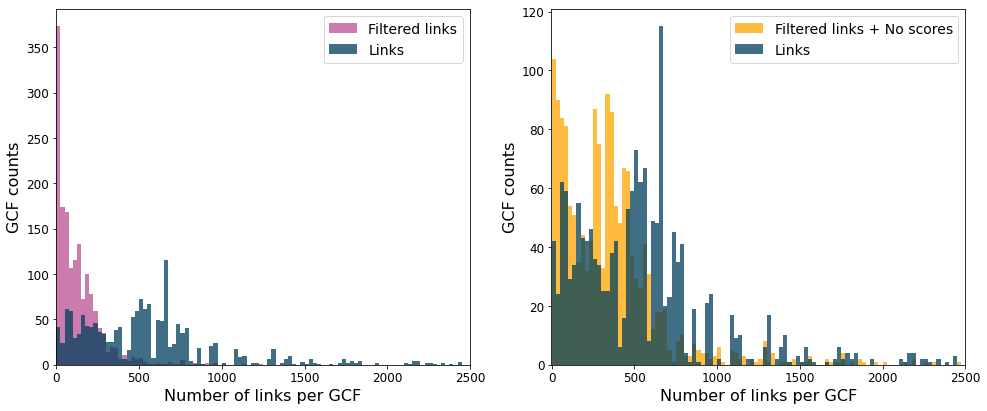

In [88]:
labels = ["Links", "Filtered links", "Filtered links + No scores"]
colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [all_num_links, all_num_filtered_links, all_filt_links]
# x1 = [all_num_links, all_num_filtered_links]
# x2 = [all_num_links, all_filt_links]
lg_size = 14
custom_xlim = (-1, 2500)
bin_size = 25
n_bins = np.arange(0, 2500, bin_size)
links_title = "Number of links per GCF"
count_title = "GCF counts"
hist_type = "stepfilled"
alpha = 0.75

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.hist(xs, bins=50, density=True, histtype='bar', stacked=True, label=labels, color=colours)
# plt.legend(prop={'size': lg_size})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
(ax0, ax1) = ax

# ax0.hist(xs[:2], bins=n_bins, density=False, histtype='step', stacked=False, label=labels[:2], color=colours[:2])

ax0.hist(xs[:2], bins=n_bins, density=False, histtype=hist_type, stacked=False, label=labels[:2],
         color=colours[:2], alpha=alpha)
ax0.legend(prop={'size': lg_size})
# ax1.hist([xs[0], xs[2]], bins=n_bins, density=False, histtype='step', stacked=False, label=[labels[0], labels[2]],
#          color=[colours[0], colours[2]])

ax1.hist([xs[0], xs[2]], bins=n_bins, density=False, histtype=hist_type, stacked=False, label=[labels[0], labels[2]],
         color=[colours[0], colours[2]], alpha=alpha)
ax1.legend(prop={'size': lg_size})
# ax2.hist(x[2], bins=50, density=True, histtype='bar', stacked=True, label=labels[2], color=colours[2])
# ax2.legend(prop={'size': lg_size})

plt.setp(ax, xlim=custom_xlim, xlabel=links_title, ylabel=count_title)
fig.tight_layout()

# plt.show()
figout = "/home/louwe015/NPLinker/filtered_links_figure.svg"
plt.savefig(figout)

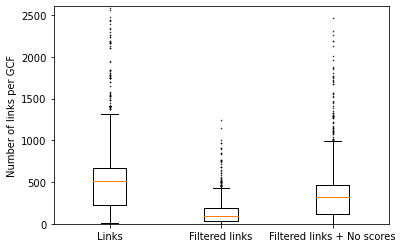

In [28]:
labels = ["Links", "Filtered links", "Filtered links + No scores"]
colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [all_num_links, all_num_filtered_links, all_filt_links]
lg_size = 14
custom_xlim = (-1, 2607)
links_title = "Number of links per GCF"

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
# (ax0, ax1, ax2) = ax

# ax0.boxplot(x[0], bins=50, density=True, histtype='bar', stacked=True, label=labels[0], color=colours[0])
# ax0.legend(prop={'size': lg_size})
# ax1.hist(x[1], bins=50, density=True, histtype='bar', stacked=True, label=labels[1], color=colours[1])
# ax1.legend(prop={'size': lg_size})
# ax2.hist(x[2], bins=50, density=True, histtype='bar', stacked=True, label=labels[2], color=colours[2])
# ax2.legend(prop={'size': lg_size})

plt.boxplot(xs, labels=labels, flierprops={"markersize": 0.5})

# plt.setp(ax, xlim=custom_xlim)
plt.ylim(custom_xlim)
plt.ylabel(links_title)
# fig.tight_layout()
plt.show()

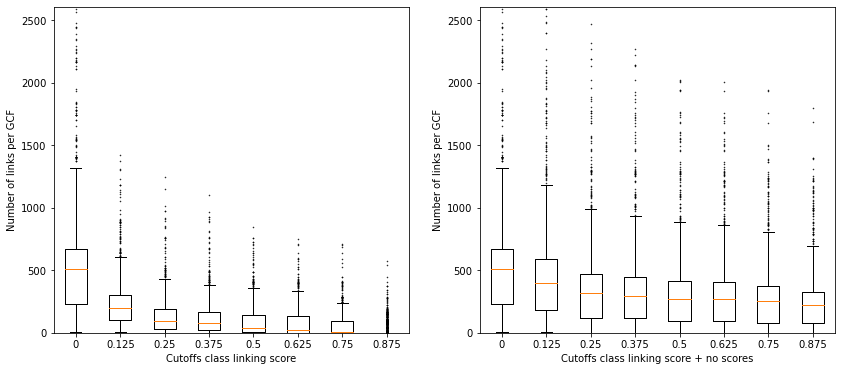

In [29]:
sorted_filt_items = sorted(d_all_num_filtered_links.items())

labels = ["0"] + [f"{cut}" for cut, vals in sorted_filt_items]
# colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [all_num_links] + [vals for keys, vals in sorted_filt_items]
xs_no_scores = [all_num_links] + [[v+n for v, n in zip(vals, all_no_scores)] for keys, vals in sorted_filt_items]

lg_size = 14
custom_xlim = (-1, 2607)
links_title = "Number of links per GCF"

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
(ax0, ax1) = ax

# ax0.boxplot(x[0], bins=50, density=True, histtype='bar', stacked=True, label=labels[0], color=colours[0])
# ax0.legend(prop={'size': lg_size})
# ax1.hist(x[1], bins=50, density=True, histtype='bar', stacked=True, label=labels[1], color=colours[1])
# ax1.legend(prop={'size': lg_size})
# ax2.hist(x[2], bins=50, density=True, histtype='bar', stacked=True, label=labels[2], color=colours[2])
# ax2.legend(prop={'size': lg_size})

ax0.boxplot(xs, labels=labels, flierprops={"markersize": 0.5})
ax1.boxplot(xs_no_scores, labels=labels, flierprops={"markersize": 0.5})

plt.setp(ax0, ylim=custom_xlim, xlabel="Cutoffs class linking score", ylabel=links_title)
plt.setp(ax1, ylim=custom_xlim, xlabel="Cutoffs class linking score + no scores", ylabel=links_title)
# fig.tight_layout()
plt.show()

<AxesSubplot:>

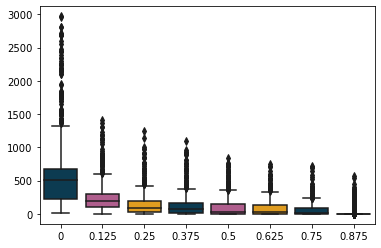

In [30]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({lab: x for x, lab in zip(xs, labels)})
df
sns.boxplot(data=df, palette=colours)
# plt.x_label = "Number of links per GCF"

## MolNetEnhancer

In [91]:
import os
mne_file = os.path.join(npl.root_dir, "molnetenhancer", "ClassyFireResults_Network.txt")
os.path.isfile(mne_file)

True

In [198]:
mne_component_dict = {}
mne_cluster2component = {}
k=0
with open(mne_file) as inf:
    header = inf.readline().strip().split("\t")
    print(header)
    columns = ['cf_direct_parent' if col == 'CF_Dparent' else col.lower()\
               for i, col in enumerate(header[3:]) if i%2 == 0]
    print(columns, len(columns))
    for line in inf:
        line = line.strip('\n').split("\t")
        cluster = line.pop(0)
        component = line.pop(0)
        nr_nodes = line.pop(0)
        class_info = []
        for i in range(0, len(line), 2):
            class_tup = (line[i], float(line[i+1]))
            class_info.append(class_tup)
#         print('--', cluster, component, nr_nodes, class_info, len(class_info))
        if not component in mne_component_dict:
            mne_component_dict[component] = class_info
        mne_cluster2component[cluster] = component
#         if k==9:
#             break
#         k+=1
len(mne_component_dict), len(mne_cluster2component)

['cluster index', 'CF_componentindex', 'CF_NrNodes', 'CF_kingdom', 'CF_kingdom_score', 'CF_superclass', 'CF_superclass_score', 'CF_class', 'CF_class_score', 'CF_subclass', 'CF_subclass_score', 'CF_Dparent', 'CF_Dparent_score', 'CF_MFramework', 'CF_MFramework_score']
['cf_kingdom', 'cf_superclass', 'cf_class', 'cf_subclass', 'cf_direct_parent', 'cf_mframework'] 6


(8346, 13667)

### check MNE coverage over MFs

In [116]:
from collections import Counter
column_counters = [Counter() for col in columns]

for values in mne_component_dict.values():
    for i, tup in enumerate(values):
        column_counters[i].update([tup[0]])

In [119]:
columns[1], column_counters[1], len(mne_component_dict)

('CF_superclass',
 Counter({'Benzenoids': 199,
          'Phenylpropanoids and polyketides': 1001,
          'Organoheterocyclic compounds': 484,
          'Alkaloids and derivatives': 110,
          'no matches': 3057,
          'Lipids and lipid-like molecules': 1512,
          'Organic acids and derivatives': 1605,
          'Organic oxygen compounds': 169,
          'Organic nitrogen compounds': 76,
          'Nucleosides, nucleotides, and analogues': 17,
          'Lignans, neolignans and related compounds': 56,
          'Organosulfur compounds': 1,
          'Hydrocarbon derivatives': 16,
          'Organic Polymers': 35,
          'Organohalogen compounds': 8}),
 8346)

CF_superclass 
 [(0.0, 3057), (0.1, 5), (0.2, 51), (0.3, 191), (0.4, 192), (0.5, 412), (0.6, 114), (0.7, 84), (0.8, 75), (0.9, 19), (1.0, 4146)] 
 8346


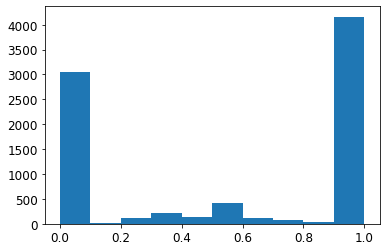

In [195]:
# now for scores rounded on 1 decimal
column_counters = [Counter() for col in columns]
column_vals = [[] for col in columns]
x = 1  # superclass

for values in mne_component_dict.values():
    for i, tup in enumerate(values):
        column_vals[i].append(tup[1])
        column_counters[i].update([round(tup[1],1)])
print(columns[x],'\n', sorted(column_counters[x].items()), '\n', len(mne_component_dict))
plt.hist(column_vals[x], bins=10)
plt.show()

In [320]:
# nodes with a superclass
node_superclass_counts = Counter()
for node, comp in mne_cluster2component.items():
    superclass = mne_component_dict[comp][1][0]
    node_superclass_counts.update([superclass])
columns[1], sorted(node_superclass_counts.most_common()), len(mne_cluster2component)

('cf_superclass',
 [('Alkaloids and derivatives', 173),
  ('Benzenoids', 281),
  ('Hydrocarbon derivatives', 17),
  ('Lignans, neolignans and related compounds', 61),
  ('Lipids and lipid-like molecules', 4597),
  ('Nucleosides, nucleotides, and analogues', 18),
  ('Organic Polymers', 105),
  ('Organic acids and derivatives', 2437),
  ('Organic nitrogen compounds', 79),
  ('Organic oxygen compounds', 231),
  ('Organohalogen compounds', 16),
  ('Organoheterocyclic compounds', 1013),
  ('Organosulfur compounds', 1),
  ('Phenylpropanoids and polyketides', 1528),
  ('no matches', 3110)],
 13667)

In [322]:
for t1,t2 in sorted(node_superclass_counts.most_common()):
    print(f'{t1}\t{t2}')

Alkaloids and derivatives	173
Benzenoids	281
Hydrocarbon derivatives	17
Lignans, neolignans and related compounds	61
Lipids and lipid-like molecules	4597
Nucleosides, nucleotides, and analogues	18
Organic Polymers	105
Organic acids and derivatives	2437
Organic nitrogen compounds	79
Organic oxygen compounds	231
Organohalogen compounds	16
Organoheterocyclic compounds	1013
Organosulfur compounds	1
Phenylpropanoids and polyketides	1528
no matches	3110


In [319]:
sum(node_superclass_counts.values()) - 3110  # minus 'no matches'

10557

In [326]:
# nodes with a superclass <850 Da to compare to canopus
node_superclass_counts_cut = Counter()
cut = 850
for node, comp in mne_cluster2component.items():
    spec = [spec for spec in npl.spectra if spec.spectrum_id == int(node)][0]
    if spec.parent_mz < cut:
        superclass = mne_component_dict[comp][1][0]
        node_superclass_counts_cut.update([superclass])
columns[1], node_superclass_counts_cut, sum(node_superclass_counts_cut.values())

('cf_superclass',
 Counter({'Benzenoids': 263,
          'Phenylpropanoids and polyketides': 1373,
          'Organoheterocyclic compounds': 981,
          'Alkaloids and derivatives': 150,
          'no matches': 2633,
          'Lipids and lipid-like molecules': 3603,
          'Organic acids and derivatives': 1865,
          'Organic oxygen compounds': 209,
          'Organic nitrogen compounds': 78,
          'Nucleosides, nucleotides, and analogues': 18,
          'Lignans, neolignans and related compounds': 60,
          'Organosulfur compounds': 1,
          'Hydrocarbon derivatives': 14,
          'Organohalogen compounds': 16,
          'Organic Polymers': 10}),
 11274)

In [327]:
for t1,t2 in sorted(node_superclass_counts_cut.most_common()):
    print(f'{t1}\t{t2}')

Alkaloids and derivatives	150
Benzenoids	263
Hydrocarbon derivatives	14
Lignans, neolignans and related compounds	60
Lipids and lipid-like molecules	3603
Nucleosides, nucleotides, and analogues	18
Organic Polymers	10
Organic acids and derivatives	1865
Organic nitrogen compounds	78
Organic oxygen compounds	209
Organohalogen compounds	16
Organoheterocyclic compounds	981
Organosulfur compounds	1
Phenylpropanoids and polyketides	1373
no matches	2633


In [328]:
# nodes with a superclass that have canopus prediction
node_superclass_counts_also_canopus = Counter()
for node, comp in mne_cluster2component.items():
    spec = [spec for spec in npl.spectra if spec.spectrum_id == int(node)][0]
    if node in npl.canopus.spectra_classes:
        superclass = mne_component_dict[comp][1][0]
        node_superclass_counts_also_canopus.update([superclass])
columns[1], node_superclass_counts_also_canopus, sum(node_superclass_counts_also_canopus.values())

('cf_superclass',
 Counter({'Benzenoids': 203,
          'Phenylpropanoids and polyketides': 951,
          'Organoheterocyclic compounds': 773,
          'Alkaloids and derivatives': 119,
          'no matches': 1940,
          'Lipids and lipid-like molecules': 2686,
          'Organic acids and derivatives': 1553,
          'Organic oxygen compounds': 165,
          'Organic nitrogen compounds': 72,
          'Nucleosides, nucleotides, and analogues': 16,
          'Lignans, neolignans and related compounds': 33,
          'Organosulfur compounds': 1,
          'Hydrocarbon derivatives': 8,
          'Organohalogen compounds': 16,
          'Organic Polymers': 10}),
 8546)

In [329]:
for t1,t2 in sorted(node_superclass_counts_also_canopus.most_common()):
    print(f'{t1}\t{t2}')

Alkaloids and derivatives	119
Benzenoids	203
Hydrocarbon derivatives	8
Lignans, neolignans and related compounds	33
Lipids and lipid-like molecules	2686
Nucleosides, nucleotides, and analogues	16
Organic Polymers	10
Organic acids and derivatives	1553
Organic nitrogen compounds	72
Organic oxygen compounds	165
Organohalogen compounds	16
Organoheterocyclic compounds	773
Organosulfur compounds	1
Phenylpropanoids and polyketides	951
no matches	1940


In [324]:
# compare to CANOPUS
node_canopus_superclass_count = Counter()
for spectrum in npl.spectra:
    classes = npl.canopus.spectra_classes.get(str(spectrum.spectrum_id))
    if classes:
        node_canopus_superclass_count.update([classes[1][0][0]])
npl.canopus.spectra_classes_names[1], sorted(node_canopus_superclass_count.most_common()), sum(node_canopus_superclass_count.values())

('cf_superclass',
 [('Alkaloids and derivatives', 9),
  ('Benzenoids', 522),
  ('Hydrocarbon derivatives', 13),
  ('Hydrocarbons', 1),
  ('Lignans, neolignans and related compounds', 3),
  ('Lipids and lipid-like molecules', 1647),
  ('Nucleosides, nucleotides, and analogues', 136),
  ('Organic 1,3-dipolar compounds', 30),
  ('Organic Polymers', 2),
  ('Organic acids and derivatives', 4057),
  ('Organic nitrogen compounds', 280),
  ('Organic oxygen compounds', 882),
  ('Organoheterocyclic compounds', 731),
  ('Organophosphorus compounds', 2),
  ('Organosulfur compounds', 29),
  ('Phenylpropanoids and polyketides', 202)],
 8546)

In [325]:
for t1,t2 in sorted(node_canopus_superclass_count.most_common()):
    print(f"{t1}\t{t2}")

Alkaloids and derivatives	9
Benzenoids	522
Hydrocarbon derivatives	13
Hydrocarbons	1
Lignans, neolignans and related compounds	3
Lipids and lipid-like molecules	1647
Nucleosides, nucleotides, and analogues	136
Organic 1,3-dipolar compounds	30
Organic Polymers	2
Organic acids and derivatives	4057
Organic nitrogen compounds	280
Organic oxygen compounds	882
Organoheterocyclic compounds	731
Organophosphorus compounds	2
Organosulfur compounds	29
Phenylpropanoids and polyketides	202


In [334]:
# canopus predictions that also have MNE predictions
canopus_also_mne_superclass = Counter()
for node, comp in mne_cluster2component.items():
    spec = [spec for spec in npl.spectra if spec.spectrum_id == int(node)][0]
    if mne_component_dict[comp][1][0] and not mne_component_dict[comp][1][0] == 'no matches':
        classes = npl.canopus.spectra_classes.get(node)
        if classes:
            superclass = classes[1][0][0]
            canopus_also_mne_superclass.update([superclass])
columns[1], canopus_also_mne_superclass, sum(canopus_also_mne_superclass.values())

('cf_superclass',
 Counter({'Benzenoids': 338,
          'Lipids and lipid-like molecules': 1301,
          'Organic nitrogen compounds': 243,
          'Nucleosides, nucleotides, and analogues': 81,
          'Hydrocarbon derivatives': 13,
          'Organic oxygen compounds': 700,
          'Organic acids and derivatives': 3229,
          'Organoheterocyclic compounds': 534,
          'Phenylpropanoids and polyketides': 113,
          'Organosulfur compounds': 24,
          'Alkaloids and derivatives': 7,
          'Organic 1,3-dipolar compounds': 16,
          'Lignans, neolignans and related compounds': 3,
          'Organophosphorus compounds': 2,
          'Hydrocarbons': 1,
          'Organic Polymers': 1}),
 6606)

In [335]:
for t1,t2 in sorted(canopus_also_mne_superclass.most_common()):
    print(f"{t1}\t{t2}")

Alkaloids and derivatives	7
Benzenoids	338
Hydrocarbon derivatives	13
Hydrocarbons	1
Lignans, neolignans and related compounds	3
Lipids and lipid-like molecules	1301
Nucleosides, nucleotides, and analogues	81
Organic 1,3-dipolar compounds	16
Organic Polymers	1
Organic acids and derivatives	3229
Organic nitrogen compounds	243
Organic oxygen compounds	700
Organoheterocyclic compounds	534
Organophosphorus compounds	2
Organosulfur compounds	24
Phenylpropanoids and polyketides	113


In [318]:
len(npl.canopus.spectra_classes)

8546

In [134]:
spec = [spec for spec in npl.spectra if spec.spectrum_id == 89513][0]
spec.precursor_mz, spec.parent_mz

(483.19601, 482.1887335480092)

In [207]:
class MolNetEnhancer_results:
    """Class for storing MolNetEnhancer results
    
    The input file for ClassyFire results is read from the molnetenhancer directory:
        - ClassyFireResults_Network.txt
    """
    def __init__(self, root_dir):
        """Read the class info from file in root_dir/molnetenhancer/
        
        root_dir: str, root_dir of NPLinker dir
        """
        cf_classes_names, molfam_classes, spectra2molfam = self._read_cf_classes(root_dir)
        self._spectra2molfam = spectra2molfam
        self._molfam_classes = molfam_classes
        self._spectra_classes_names = cf_classes_names  # if NPC gets implemented, add here
        self._spectra_classes_names_inds = {elem:i for i,elem in enumerate(cf_classes_names)}
        
    def _read_cf_classes(self, root_dir):
        """Read ClassyFireResults_Network.txt in molnetenhancer dir
        
        root_dir: str
        returns: tuple of:
            -list of str - names of the classes in order
            -dict of {str: [(str, float)]} - linking molfams to (classes, scores) in order of names,
                singleton families are denoted with S[\d]+
            -dict of {str:str} - linking spectra to molfams
        """
        columns = []
        mne_component_dict = {}
        mne_cluster2component = {}
        input_file = os.path.join(root_dir, "molnetenhancer", "ClassyFireResults_Network.txt")
        if not os.path.isfile(input_file):
            print("no molnetenhancer input")  # todo: add to logger
            return columns, mne_component_dict, mne_cluster2component
        with open(mne_file) as inf:
            header = inf.readline().strip().split("\t")
            columns = ['cf_direct_parent' if col == 'CF_Dparent' else col.lower()
                       for i, col in enumerate(header[3:]) if i%2 == 0]
            for line in inf:
                line = line.strip('\n').split("\t")
                cluster = line.pop(0)
                component = line.pop(0)
                nr_nodes = line.pop(0)
                class_info = []
                for i in range(0, len(line), 2):
                    class_tup = (line[i], float(line[i+1]))
                    class_info.append(class_tup)
                if not component in mne_component_dict:
                    mne_component_dict[component] = class_info
                mne_cluster2component[cluster] = component

        return columns, mne_component_dict, mne_cluster2component
    
    def spectra_classes(self, spectrum_id):
        """Return classes by relating spectrum_id in the molfam_classes
        
        spectrum_id: int/str, spectrum_id - ints will be converted to str
        """
        classes = []
        if isinstance(spectrum_id, int):
            spectrum_id = str(spectrum_id)
        molfam_id = self.spectra2molfam.get(spectrum_id)
        if molfam_id:
            classes = self.molfam_classes.get(molfam_id)
        return classes
    
    @property
    def spectra2molfam(self):
        return self._spectra2molfam
    
    @property
    def spectra_classes_names(self):
        return self._spectra_classes_names
    
    @property
    def spectra_classes_names_inds(self):
        return self._spectra_classes_names_inds
    
    @property
    def molfam_classes(self):
        return self._molfam_classes

mne_res = MolNetEnhancer_results(npl.root_dir)
mne_res.spectra_classes_names, mne_res.spectra_classes(1), len(mne_res.spectra2molfam), mne_res.spectra2molfam.get('1'), len(mne_res.molfam_classes), mne_res.molfam_classes.get("201")

(['cf_kingdom',
  'cf_superclass',
  'cf_class',
  'cf_subclass',
  'cf_direct_parent',
  'cf_mframework'],
 [('Organic compounds', 1.0),
  ('Benzenoids', 0.38470017636684306),
  ('Benzene and substituted derivatives', 0.37081128747795417),
  ('', 0.1358024691358025),
  ('Phenyl methylcarbamates', 0.1111111111111111),
  ('Aromatic homomonocyclic compounds', 0.3271604938271605)],
 13667,
 '201',
 8346,
 [('Organic compounds', 1.0),
  ('Benzenoids', 0.38470017636684306),
  ('Benzene and substituted derivatives', 0.37081128747795417),
  ('', 0.1358024691358025),
  ('Phenyl methylcarbamates', 0.1111111111111111),
  ('Aromatic homomonocyclic compounds', 0.3271604938271605)])

### Dev new class linking score taking multiple classifications as input

In [226]:
mf_t = npl.molfams[0]
sp_t = npl.spectra[26]
gcf_t = npl.gcfs[0]
bgc_t = npl.bgcs[0]
mf_t.family_id, sp_t.spectrum_id, gcf_t.gcf_id, bgc_t.cluster

(201, 63, 5, 6)

In [261]:
from nplinker.nplinker import BGC, GCF, Spectrum
def dev_score(self_test, self_mne, obj, target,
               method = 'main'):  # self_test should be the npl object
    """Return sorted class link scores for scoring obj and target

    The input objects can be any mix of the following NPLinker types:
        - BGC
        - GCF
        - Spectrum
        - MolecularFamily

    Args:
        - obj: one of the possible input objects
        - target: one of the possible input objects
        - method: str, which classification method to use for spectra. default is 'main'
            options:
                -'main': use the main method - currently canopus
                -'mix': use main method first, when no main classes present, use the others
                if present
                -'canopus': use only canopus class predictions
                -'molnetenhancer': use only molnetenhancer class predictions
    Returns:
        List of tuple of
        (score, obj_class_lvl, target_class_lvl, obj_class, target_class)
        (float, str, str, str, str)
        List will be empty if either BGC or spectrum classes are missing
    """
    # assess what is obj and target
    spec_like = obj
    bgc_like = target
    bgc_to_spec = False
    if isinstance(obj, BGC) or isinstance(obj, GCF):
        bgc_like = obj
        spec_like = target
        bgc_to_spec = True

    # assess if bgc or gcf and if spectrum or molfam
    is_spectrum = False
    is_bgc = False
    if isinstance(spec_like, Spectrum):
        is_spectrum = True
    if isinstance(bgc_like, BGC):
        is_bgc = True

    # assess method
    method_options = ('main', 'mix', 'canopus', 'molnetenhancer')
    assert method in method_options, f"NPClass method should be one of {method_options}"

    # gather correct classes based on input, dict for bgcs and list for spec
    if is_bgc:
        # get parent gcf for bgc
        bgc_like_gcf = [gcf for gcf in self_test.gcfs if bgc_like.id in [b.id for b in gcf.bgcs]][0]
        # gather AS classes and convert to names in scoring dict
        as_classes = self_test.class_links.convert_as_classes(bgc_like.product_prediction.split("."))
        bgc_like_classes_dict = {"bigscape_class": bgc_like_gcf.bigscape_class,  # str - always one bigscape class right?
                                 "as_classes": as_classes}  # list(str)
    else:
        as_classes = self_test.class_links.convert_as_classes(self_test.class_links.get_gcf_as_classes(bgc_like, 0.5))
        bgc_like_classes_dict = {"bigscape_class": bgc_like.bigscape_class,  # str - always one bigscape class right?
                                 "as_classes": as_classes}  # list(str)
    
    # gather classes for spectra, choose right method
    # choose the main method here by including it as a <'main' in method> 
    use_canopus = 'main' in method or 'canopus' in method or 'mix' in method
    use_mne = 'molnetenhancer' in method or 'mix' in method
    spec_like_classes, spec_like_classes_names, spec_like_classes_names_inds = (None, None, None)
    if use_canopus and not spec_like_classes:
        if is_spectrum:
            # list of list of tuples/None - todo: add to spectrum object
            # take only 'best' (first) classification per ontology level
            all_classes = self_test.canopus.spectra_classes.get(str(spec_like.spectrum_id))
            if all_classes:
                spec_like_classes = [cls_per_lvl for lvl in all_classes
                                     for i, cls_per_lvl in enumerate(lvl) if i==0]
            spec_like_classes_names = self_test.canopus.spectra_classes_names
            spec_like_classes_names_inds = self_test.canopus.spectra_classes_names_inds
        else:  # molfam
            all_classes = self_test.canopus.molfam_classes.get(str(spec_like.family_id)) 
            if all_classes:
                spec_like_classes = [cls_per_lvl for lvl in all_classes
                                     for i, cls_per_lvl in enumerate(lvl) if i==0]
            spec_like_classes_names = self_test.canopus.molfam_classes_names
            spec_like_classes_names_inds = self_test.canopus.molfam_classes_names_inds
    if use_mne and not spec_like_classes:  # if mne or when main/canopus does not get classes
        if is_spectrum:
            spec_like_classes = self_mne.spectra_classes(spec_like.spectrum_id)
        else: # molfam
            spec_like_classes = self_mne.molfam_classes.get(str(spec_like.family_id))
        # classes are same for molfam and spectrum so names are irrespective of is_spectrum
        spec_like_classes_names = self_mne.spectra_classes_names
        spec_like_classes_names_inds = self_mne.spectra_classes_names_inds


    scores = []  # this will be returned if one of the class sides is absent
    std_score = 0  # if link not recorded in scores (mibig) return this score
    # loop through classes that are possible to link (names in class_link object)
    for bgc_class_name in self_test.class_links.bgc_class_names:
        if bgc_class_name == "mibig_classes":
            # treat specially as bigscape class needs to be translated to mibig class
            bigscape_class = bgc_like_classes_dict["bigscape_class"]
            # convert bigscape class to mibig class
            bgc_like_classes = [self_test.class_links.bigscape_mibig_conversion.get(bigscape_class)]
        else:
            bgc_like_classes = bgc_like_classes_dict.get(bgc_class_name)
        if bgc_like_classes and spec_like_classes:  # check for classes from both sides
            for bgc_class in bgc_like_classes:
                for chem_class_name in self_test.class_links.chem_class_names:
                    # does info exist for this spectrum class level, return index for class level
                    spec_class_level_i = spec_like_classes_names_inds.get(chem_class_name)
                    if spec_class_level_i:
                        spec_class_tup = spec_like_classes[spec_class_level_i]
                        if spec_class_tup:  # if there is a class at this lvl
                            spec_class = spec_class_tup[0]  # is a tuple of (name, score) so take [0]
                            
                            # determine direction of scoring: BGC -> spectrum
                            if bgc_to_spec:
                                score = self_test.class_links.class_links[bgc_class_name][chem_class_name]\
                                    .get(bgc_class,{}).get(spec_class, std_score)
                                result_tuple = (score, bgc_class_name, chem_class_name, bgc_class, spec_class)
                            else:  # spectrum -> BGC
                                score = self_test.class_links.class_links[chem_class_name][bgc_class_name]\
                                    .get(spec_class, {}).get(bgc_class, std_score)
                                result_tuple = (score, chem_class_name, bgc_class_name, spec_class, bgc_class)
                            scores.append(result_tuple)
    return sorted(scores, reverse=True)

In [266]:
meth = 'main'
print(dev_score(npl, mne_res, mf_t, gcf_t, meth), dev_score(npl, mne_res, gcf_t, mf_t, meth))
dev_score(npl, mne_res, sp_t, gcf_t, meth), dev_score(npl, mne_res, gcf_t, sp_t, meth)

[(0.25096525096525096, 'npc_pathway', 'as_classes', 'Alkaloids', 'NRPS'), (0.20930232558139536, 'npc_pathway', 'mibig_classes', 'Alkaloids', 'NRP'), (0.14285714285714285, 'cf_subclass', 'as_classes', 'Amines', 'NRPS'), (0.09407665505226481, 'cf_superclass', 'as_classes', 'Lipids and lipid-like molecules', 'NRPS'), (0.0718232044198895, 'cf_class', 'as_classes', 'Prenol lipids', 'NRPS'), (0.013333333333333334, 'cf_superclass', 'mibig_classes', 'Lipids and lipid-like molecules', 'NRP'), (0.006622516556291391, 'cf_class', 'mibig_classes', 'Prenol lipids', 'NRP'), (0.0, 'npc_superclass', 'mibig_classes', 'Pseudoalkaloids (transamidation)', 'NRP'), (0, 'npc_superclass', 'as_classes', 'Pseudoalkaloids (transamidation)', 'NRPS'), (0, 'npc_class', 'mibig_classes', 'Phenylalanine-derived alkaloids', 'NRP'), (0, 'npc_class', 'as_classes', 'Phenylalanine-derived alkaloids', 'NRPS'), (0.0, 'cf_subclass', 'mibig_classes', 'Amines', 'NRP')] [(0.17902350813743217, 'mibig_classes', 'npc_pathway', 'NRP'

([], [])

In [248]:
npl.class_links.class_links_counts['cf_direct_parent']['mibig_classes']["Oligopeptides"]

Polyketide         1.000
Other              6.000
Saccharide         1.000
Terpene            1.000
PKS-NRP_Hybrids    9.000
NRP               72.000
RiPP              20.000
Name: Oligopeptides, dtype: float64

In [276]:
for spec in npl.spectra:
    t_mne_classes = mne_res.spectra_classes(str(spec.spectrum_id))
    t_can_classes = npl.canopus.spectra_classes.get(str(spec.spectrum_id))
    if not t_can_classes:
        if t_mne_classes:
#             print(spec)
#             print(t_can_classes)
#             print(t_mne_classes)
#             break
            pass
        else:
            print(spec)

In [317]:
parent_mz_count = 0
for spec in npl.spectra:
    if spec.parent_mz >= 850:
        parent_mz_count += 1
print("Spectra with parent mass >850 Da:", parent_mz_count)

Spectra with parent mass >850 Da: 2393


In [316]:
dir(spec)

['__class__',
 '__cmp__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_jcamp',
 '_losses',
 'add_strain',
 'annotations',
 'edges',
 'family',
 'family_id',
 'get_growth_medium',
 'get_metadata_value',
 'gnps_annotations',
 'gnps_id',
 'growth_media',
 'has_annotations',
 'has_loss',
 'has_strain',
 'id',
 'is_library',
 'keep_top_k',
 'losses',
 'max_ms2_intensity',
 'metadata',
 'n_peaks',
 'normalised_peaks',
 'parent_mz',
 'peaks',
 'precursor_mz',
 'rt',
 'set_annotations',
 'spectrum_id',
 'strains',
 'to_jcamp_str',
 'total_ms2_intensity']

In [ ]:
#idea: make the class linking score with a method: ('canopus', 'molnetenhancer', 'mix')
#where: canopus < 850 Da, use MNE if there is a MNE, use MNE >850

#idea: make a class called whatever: NPClass and then create functions there, e.a. score, get_spec_classes etc
#maybe then indeed better to implement it similar to existing scores

### Making filtering plots with MNE results added (method: mix)

In [271]:
mix_all_num_links = []
mix_all_num_filtered_links = []
mix_all_no_scores = []
mix_filt_cl_scores = []
mix_zero_scores = []
cur_meth = 'mix'
cs_cutoff = 0.25
# loop through links for all gcfs
for obj, result in results.links.items():
#     print(i)
    sorted_links = results.get_sorted_links(mc, obj)
    num_links = 0
    num_filtered_links = 0
    no_scores = 0
    # for each gcf, loop through link
    for link_data in sorted_links:
            if isinstance(link_data.target, Spectrum):
                num_links += 1
    #             print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
    #                                                                     link_data.target, 
    #                                                                     mc.format_data(link_data[mc]), 
    #                                                                     len(link_data.shared_strains)))
#                 cl_score = npl.class_linking_score(obj, link_data.target)
                cl_score = dev_score(npl, mne_res, obj, link_data.target, cur_meth)
                # cl_score = npl....
                if cl_score:
                    if cl_score[0][0] > cs_cutoff:
                        num_filtered_links += 1
#                         print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
#                                                                             link_data.target, 
#                                                                             mc.format_data(link_data[mc]), 
#                                                                             len(link_data.shared_strains)))
                    else:
                        mix_filt_cl_scores.append(cl_score)
                        for elem in cl_score:
                            if elem[0] == 0:
                                mix_zero_scores.append((elem, obj, link_data.target))
                else:
                    no_scores += 1
    mix_all_num_links.append(num_links)
    mix_all_num_filtered_links.append(num_filtered_links)
    mix_all_no_scores.append(no_scores)

# add filtered and no scores together
mix_all_filt_links = [filt + nosc for filt, nosc in zip(mix_all_num_filtered_links, mix_all_no_scores)]

In [272]:
for summary_scores in (mix_all_num_links, mix_all_num_filtered_links, mix_all_no_scores, mix_all_filt_links):
    print(np.mean(summary_scores))

549.8481973434535
177.0
0.0
177.0


In [300]:
print("Percentage of old links after filtering", np.mean(mix_all_num_filtered_links)/np.mean(mix_all_num_links))
print("Decrease of avg links after filtering",
      (np.mean(mix_all_num_filtered_links) - np.mean(mix_all_num_links)) / np.mean(mix_all_num_links))

Percentage of old links after filtering 0.3219070297132208
Decrease of avg links after filtering -0.6780929702867792


In [336]:
up = 2
low = 0
before = mix_all_num_links
# after = all_num_filtered_links
after = mix_all_filt_links
before_range = len([filt_link for filt_link in before if filt_link > low and filt_link < up])
after_range = len([filt_link for filt_link in after if filt_link > low and filt_link < up])
before_range, after_range

(0, 12)

In [273]:
mix_zero_scores

[((0.0, 'mibig_classes', 'cf_superclass', 'NRP', 'Hydrocarbon derivatives'),
  GCF(id=11, class=NRPS, gcf_id=450, strains=2),
  Spectrum(id=1, spectrum_id=4, strains=1)),
 ((0, 'mibig_classes', 'cf_class', 'NRP', 'Organic oxides'),
  GCF(id=11, class=NRPS, gcf_id=450, strains=2),
  Spectrum(id=1, spectrum_id=4, strains=1)),
 ((0.0, 'as_classes', 'cf_superclass', 'NRPS-like', 'Hydrocarbon derivatives'),
  GCF(id=11, class=NRPS, gcf_id=450, strains=2),
  Spectrum(id=1, spectrum_id=4, strains=1)),
 ((0.0, 'as_classes', 'cf_superclass', 'NRPS', 'Hydrocarbon derivatives'),
  GCF(id=11, class=NRPS, gcf_id=450, strains=2),
  Spectrum(id=1, spectrum_id=4, strains=1)),
 ((0.0, 'as_classes', 'cf_superclass', 'NRPS', 'Hydrocarbon derivatives'),
  GCF(id=11, class=NRPS, gcf_id=450, strains=2),
  Spectrum(id=1, spectrum_id=4, strains=1)),
 ((0, 'as_classes', 'cf_class', 'NRPS-like', 'Organic oxides'),
  GCF(id=11, class=NRPS, gcf_id=450, strains=2),
  Spectrum(id=1, spectrum_id=4, strains=1)),
 ((0

Use MNE when there is no CANOPUS prediction


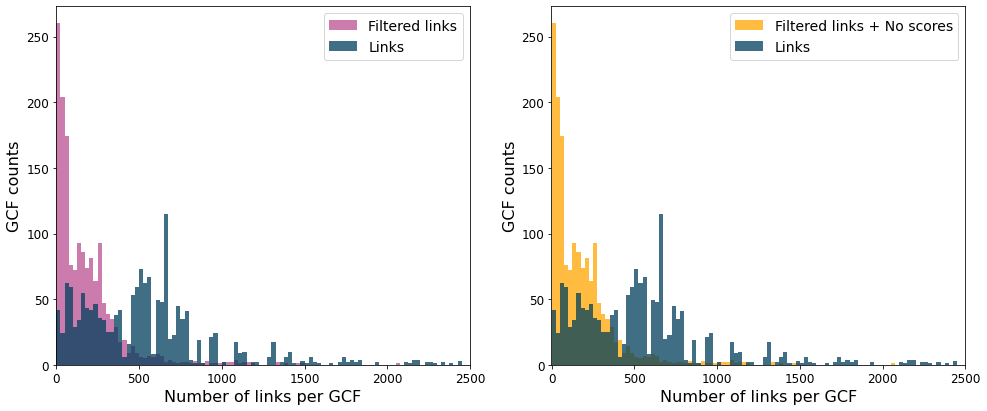

In [268]:
print("Use MNE when there is no CANOPUS prediction")
labels = ["Links", "Filtered links", "Filtered links + No scores"]
colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [mix_all_num_links, mix_all_num_filtered_links, mix_all_filt_links]
# x1 = [all_num_links, all_num_filtered_links]
# x2 = [all_num_links, all_filt_links]
lg_size = 14
custom_xlim = (-1, 2500)
bin_size = 25
n_bins = np.arange(0, 2500, bin_size)
links_title = "Number of links per GCF"
count_title = "GCF counts"
hist_type = "stepfilled"
alpha = 0.75

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.hist(xs, bins=50, density=True, histtype='bar', stacked=True, label=labels, color=colours)
# plt.legend(prop={'size': lg_size})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
(ax0, ax1) = ax

# ax0.hist(xs[:2], bins=n_bins, density=False, histtype='step', stacked=False, label=labels[:2], color=colours[:2])

ax0.hist(xs[:2], bins=n_bins, density=False, histtype=hist_type, stacked=False, label=labels[:2],
         color=colours[:2], alpha=alpha)
ax0.legend(prop={'size': lg_size})
# ax1.hist([xs[0], xs[2]], bins=n_bins, density=False, histtype='step', stacked=False, label=[labels[0], labels[2]],
#          color=[colours[0], colours[2]])

ax1.hist([xs[0], xs[2]], bins=n_bins, density=False, histtype=hist_type, stacked=False, label=[labels[0], labels[2]],
         color=[colours[0], colours[2]], alpha=alpha)
ax1.legend(prop={'size': lg_size})
# ax2.hist(x[2], bins=50, density=True, histtype='bar', stacked=True, label=labels[2], color=colours[2])
# ax2.legend(prop={'size': lg_size})

plt.setp(ax, xlim=custom_xlim, xlabel=links_title, ylabel=count_title)
fig.tight_layout()

# plt.show()
figout = "/home/louwe015/NPLinker/filtered_links_mix_can-mne_figure.svg"
plt.savefig(figout)

#### Investigate different NPClass score cutoffs


In [306]:
# gradient of class linking score cutoff

cur_meth = 'mix'
cs_cutoffs = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
mix_d_all_num_links = []
mix_d_all_num_filtered_links = {cut: [] for cut in cs_cutoffs}
mix_d_all_no_scores = []

# loop through links for all gcfs
for obj, result in results.links.items():
#     print(i)
    sorted_links = results.get_sorted_links(mc, obj)
    num_links = 0
    num_filtered_links = [0 for _ in range(len(cs_cutoffs))]
    no_scores = 0
    # for each gcf, loop through link
    for link_data in sorted_links:
            if isinstance(link_data.target, Spectrum):
                num_links += 1
                
#                 cl_score = npl.class_linking_score(obj, link_data.target)
                cl_score = dev_score(npl, mne_res, obj, link_data.target, cur_meth)
                
                if cl_score:
                    for j, cs_cut in enumerate(cs_cutoffs):
                        if cl_score[0][0] > cs_cut:
                            num_filtered_links[j] += 1

                else:
                    no_scores += 1
    mix_d_all_num_links.append(num_links)
    for k, cs_cut in enumerate(cs_cutoffs):
        mix_d_all_num_filtered_links[cs_cut].append(num_filtered_links[k])
    mix_d_all_no_scores.append(no_scores)

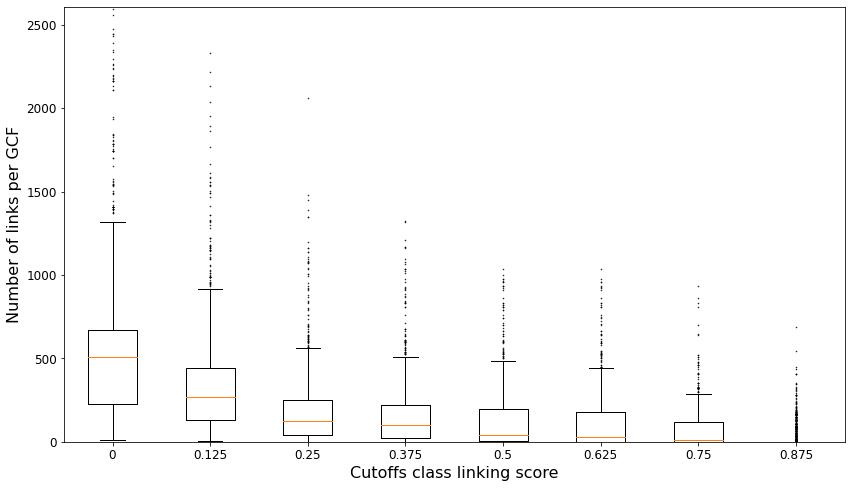

In [314]:
# investigate cutoffs
mix_sorted_filt_items = sorted(mix_d_all_num_filtered_links.items())

labels = ["0"] + [f"{cut}" for cut, vals in mix_sorted_filt_items]
# colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [mix_all_num_links] + [vals for keys, vals in mix_sorted_filt_items]
xs_no_scores = [mix_all_num_links] + [[v+n for v, n in zip(vals, mix_all_no_scores)] for keys, vals in mix_sorted_filt_items]

lg_size = 14
custom_xlim = (-1, 2607)
links_title = "Number of links per GCF"

plt.rcParams["figure.figsize"] = (14,8)
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
# (ax0, ax1) = ax

# ax0.boxplot(x[0], bins=50, density=True, histtype='bar', stacked=True, label=labels[0], color=colours[0])
# ax0.legend(prop={'size': lg_size})
# ax1.hist(x[1], bins=50, density=True, histtype='bar', stacked=True, label=labels[1], color=colours[1])
# ax1.legend(prop={'size': lg_size})
# ax2.hist(x[2], bins=50, density=True, histtype='bar', stacked=True, label=labels[2], color=colours[2])
# ax2.legend(prop={'size': lg_size})

plt.boxplot(xs, labels=labels, flierprops={"markersize": 0.5})


# ax0.boxplot(xs, labels=labels, flierprops={"markersize": 0.5})
# ax1.boxplot(xs_no_scores, labels=labels, flierprops={"markersize": 0.5})

plt.ylim(custom_xlim)
plt.xlabel("Cutoffs class linking score")
plt.ylabel(links_title)
# plt.setp(ax0, ylim=custom_xlim, xlabel="Cutoffs class linking score", ylabel=links_title)
# plt.setp(ax1, ylim=custom_xlim, xlabel="Cutoffs class linking score + no scores", ylabel=links_title)
# fig.tight_layout()
figout = "/home/louwe015/NPLinker/boxplot_cutoffs_npclass_mix_can-mne_figure.svg"
plt.savefig(figout)
plt.show()

### Check for spectrum -> GCFs

In [337]:
results_spec = npl.get_links(npl.spectra, mc, and_mode=True)

# get_links returns an instance of a class called LinkCollection. This provides a wrapper
# around the results of the scoring operation and has various useful properties/methods:
#
# - len(results) or .source_count will tell you how many of the input_objects were found to have links
print('Number of results: {}'.format(len(results_spec)))
# - .sources is a list of those objects
objects_with_links = results_spec.sources
# - .links is a dict with structure {input_object: {linked_object: ObjectLink}} 
objects_and_link_info = results_spec.links
# - .get_all_targets() will return a flat list of *all* the linked objects (for all sources)
all_targets = results_spec.get_all_targets() 
# - .methods is a list of the scoring methods passed to get_links
methods = results_spec.methods

Number of results: 13374


In [338]:
mix_all_num_links_spec = []
mix_all_num_filtered_links_spec = []
mix_all_no_scores_spec = []
mix_filt_cl_scores_spec = []
mix_zero_scores_spec = []
cur_meth = 'mix'
cs_cutoff = 0.25
# loop through links for all gcfs
for obj, result in results_spec.links.items():
#     print(i)
    sorted_links = results_spec.get_sorted_links(mc, obj)
    num_links = 0
    num_filtered_links = 0
    no_scores = 0
    # for each gcf, loop through link
    for link_data in sorted_links:
#             if isinstance(link_data.target, Spectrum):
            num_links += 1
#             print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
#                                                                     link_data.target, 
#                                                                     mc.format_data(link_data[mc]), 
#                                                                     len(link_data.shared_strains)))
#                 cl_score = npl.class_linking_score(obj, link_data.target)
            cl_score = dev_score(npl, mne_res, obj, link_data.target, cur_meth)
            # cl_score = npl....
            if cl_score:
                if cl_score[0][0] > cs_cutoff:
                    num_filtered_links += 1
#                         print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
#                                                                             link_data.target, 
#                                                                             mc.format_data(link_data[mc]), 
#                                                                             len(link_data.shared_strains)))
                else:
                    mix_filt_cl_scores_spec.append(cl_score)
                    for elem in cl_score:
                        if elem[0] == 0:
                            mix_zero_scores_spec.append((elem, obj, link_data.target))
            else:
                no_scores += 1
    mix_all_num_links_spec.append(num_links)
    mix_all_num_filtered_links_spec.append(num_filtered_links)
    mix_all_no_scores_spec.append(no_scores)

# add filtered and no scores together
mix_all_filt_links_spec = [filt + nosc for filt, nosc in zip(mix_all_num_filtered_links_spec, mix_all_no_scores_spec)]

In [340]:
for summary_scores in (mix_all_num_links_spec, mix_all_num_filtered_links_spec, mix_all_no_scores_spec, mix_all_filt_links_spec):
    print(np.mean(summary_scores))

66.11103633916555
33.47196052041274
0.0
33.47196052041274


Use MNE when there is no CANOPUS prediction


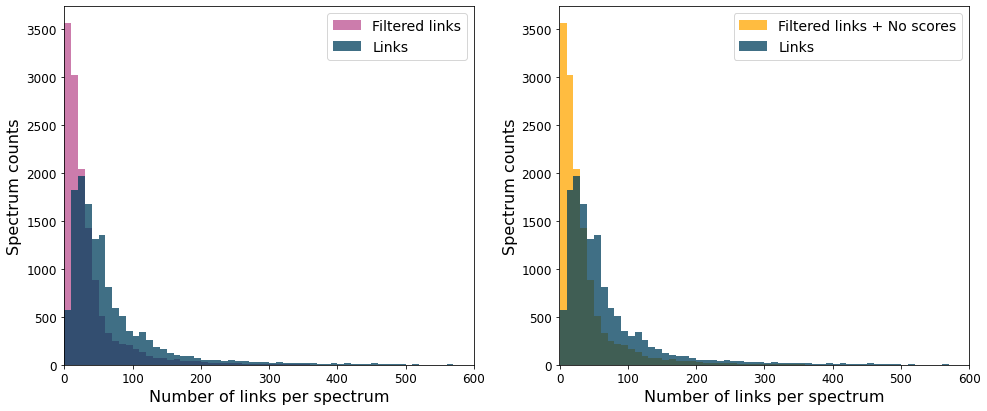

In [344]:
print("Use MNE when there is no CANOPUS prediction")
labels = ["Links", "Filtered links", "Filtered links + No scores"]
colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [mix_all_num_links_spec, mix_all_num_filtered_links_spec, mix_all_filt_links_spec]
# x1 = [all_num_links, all_num_filtered_links]
# x2 = [all_num_links, all_filt_links]
lg_size = 14
custom_xlim = (-1, max(mix_all_num_links_spec))
bin_size = 10
n_bins = np.arange(0, max(mix_all_num_links_spec), bin_size)
links_title = "Number of links per spectrum"
count_title = "Spectrum counts"
hist_type = "stepfilled"
alpha = 0.75

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.hist(xs, bins=50, density=True, histtype='bar', stacked=True, label=labels, color=colours)
# plt.legend(prop={'size': lg_size})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
(ax0, ax1) = ax

# ax0.hist(xs[:2], bins=n_bins, density=False, histtype='step', stacked=False, label=labels[:2], color=colours[:2])

ax0.hist(xs[:2], bins=n_bins, density=False, histtype=hist_type, stacked=False, label=labels[:2],
         color=colours[:2], alpha=alpha)
ax0.legend(prop={'size': lg_size})
# ax1.hist([xs[0], xs[2]], bins=n_bins, density=False, histtype='step', stacked=False, label=[labels[0], labels[2]],
#          color=[colours[0], colours[2]])

ax1.hist([xs[0], xs[2]], bins=n_bins, density=False, histtype=hist_type, stacked=False, label=[labels[0], labels[2]],
         color=[colours[0], colours[2]], alpha=alpha)
ax1.legend(prop={'size': lg_size})
# ax2.hist(x[2], bins=50, density=True, histtype='bar', stacked=True, label=labels[2], color=colours[2])
# ax2.legend(prop={'size': lg_size})

plt.setp(ax, xlim=custom_xlim, xlabel=links_title, ylabel=count_title)
fig.tight_layout()

# plt.show()
figout = "/home/louwe015/NPLinker/filtered_links_spectra_mix_can-mne_figure.svg"
plt.savefig(figout)

### Check for MF -> GCF

In [345]:
results_mfs = npl.get_links(npl.molfams, mc, and_mode=True)

# get_links returns an instance of a class called LinkCollection. This provides a wrapper
# around the results of the scoring operation and has various useful properties/methods:
#
# - len(results) or .source_count will tell you how many of the input_objects were found to have links
print('Number of results: {}'.format(len(results_mfs)))
# - .sources is a list of those objects
objects_with_links = results_mfs.sources
# - .links is a dict with structure {input_object: {linked_object: ObjectLink}} 
objects_and_link_info = results_mfs.links
# - .get_all_targets() will return a flat list of *all* the linked objects (for all sources)
all_targets = results_mfs.get_all_targets() 
# - .methods is a list of the scoring methods passed to get_links
methods = results_mfs.methods

IndexError: index 1020 is out of bounds for axis 0 with size 1020

## Investigate classes with 0 links - create translating tables 

In [31]:
# this is fine
chem_cols = {}
for chem_lvl in npl.class_links.class_links["as_classes"]:
    cols = npl.class_links.class_links["as_classes"][chem_lvl].columns
    chem_cols[chem_lvl] = list(cols)

all_cols = set([v for vals in chem_cols.values() for v in vals])
for chem_lvl in npl.class_links.class_links["as_classes"]:
    cols = npl.class_links.class_links["as_classes"][chem_lvl].columns
    col_not_in_all = [c for c in all_cols if c not in cols]
    print(chem_lvl, len(npl.class_links.class_links["as_classes"][chem_lvl].sum(axis=0)), col_not_in_all)
len(set([v for vals in chem_cols.values() for v in vals]))

cf_kingdom 51 ['acyl_amino_acids']
cf_superclass 51 ['acyl_amino_acids']
cf_class 51 ['acyl_amino_acids']
cf_direct_parent 51 ['acyl_amino_acids']
npc_class 51 ['acyl_amino_acids']
npc_superclass 51 ['acyl_amino_acids']
npc_pathway 51 ['acyl_amino_acids']
npc_isglycoside 52 []
cf_subclass 46 ['linaridin', 'sactipeptide', 'head_to_tail', 'tropodithietic-acid', 'acyl_amino_acids', 'proteusin']


52

In [32]:
chem_cols

{'cf_kingdom': ['T1PKS',
  'oligosaccharide',
  'NRPS-like',
  'PKS-like',
  'butyrolactone',
  'NRPS',
  'arylpolyene',
  'other',
  'transAT-PKS',
  'indole',
  'T3PKS',
  'transAT-PKS-like',
  'lanthipeptide',
  'hserlactone',
  'furan',
  'T2PKS',
  'ladderane',
  'aminocoumarin',
  'phenazine',
  'nucleoside',
  'amglyccycl',
  'blactam',
  'siderophore',
  'betalactone',
  'melanin',
  'bacteriocin',
  'bottromycin',
  'cyanobactin',
  'LAP',
  'thiopeptide',
  'lassopeptide',
  'linaridin',
  'microviridin',
  'proteusin',
  'head_to_tail',
  'sactipeptide',
  'terpene',
  'TfuA-related',
  'fungal-RiPP',
  'resorcinol',
  'CDPS',
  'ectoine',
  'hglE-KS',
  'PUFA',
  'PBDE',
  'phosphonate',
  'fused',
  'RaS-RiPP',
  'PpyS-KS',
  'tropodithietic-acid',
  'phosphoglycolipid'],
 'cf_superclass': ['T1PKS',
  'oligosaccharide',
  'NRPS-like',
  'PKS-like',
  'butyrolactone',
  'NRPS',
  'arylpolyene',
  'other',
  'transAT-PKS',
  'indole',
  'T3PKS',
  'transAT-PKS-like',
  'lant

In [33]:
set([v for vals in chem_cols.values() for v in vals])

{'CDPS',
 'LAP',
 'NRPS',
 'NRPS-like',
 'PBDE',
 'PKS-like',
 'PUFA',
 'PpyS-KS',
 'RaS-RiPP',
 'T1PKS',
 'T2PKS',
 'T3PKS',
 'TfuA-related',
 'acyl_amino_acids',
 'amglyccycl',
 'aminocoumarin',
 'arylpolyene',
 'bacteriocin',
 'betalactone',
 'blactam',
 'bottromycin',
 'butyrolactone',
 'cyanobactin',
 'ectoine',
 'fungal-RiPP',
 'furan',
 'fused',
 'head_to_tail',
 'hglE-KS',
 'hserlactone',
 'indole',
 'ladderane',
 'lanthipeptide',
 'lassopeptide',
 'linaridin',
 'melanin',
 'microviridin',
 'nucleoside',
 'oligosaccharide',
 'other',
 'phenazine',
 'phosphoglycolipid',
 'phosphonate',
 'proteusin',
 'resorcinol',
 'sactipeptide',
 'siderophore',
 'terpene',
 'thiopeptide',
 'transAT-PKS',
 'transAT-PKS-like',
 'tropodithietic-acid'}

In [34]:
as_class_sum = '''acyl_amino_acids	N-acyl amino acid cluster	4.0	4.1
aminocoumarin	Aminocoumarin cluster	<= 3.0	<= 3.0
amglyccycl	Aminoglycoside/aminocyclitol cluster	<= 3.0	<= 3.0
arylpolyene	Aryl polyene cluster	<= 3.0	<= 3.0
betalactone	beta-lactone containing protease inhibitor	5.0	5.0
blactam	β-lactam cluster	<= 3.0	<= 3.0
bottromycin	Bottromycin cluster	<= 3.0	<= 3.0
butyrolactone	Butyrolactone cluster	<= 3.0	<= 3.0
CDPS	tRNA-dependent cyclodipeptide synthases	5.0	5.0
cyanobactin	Cyanobactins like patellamide (AY986476)	<= 3.0	6.0
cyclic-lactone-autoinducer	agrD-like cyclic lactone autoinducer peptides (AF001782)	6.0	6.0
ectoine	Ectoine cluster	<= 3.0	<= 3.0
epipeptide	D-amino-acid containing RiPPs such as yydF (D78193)	6.0	6.0
fatty_acid	Fatty acid cluster (loose strictness, likely from primary metabolism)	<= 3.0	4.2
furan	Furan cluster	<= 3.0	5.0
fungal-RiPP	Fungal RiPP with POP or UstH peptidase types and a modification	5.0	5.0
glycocin	Glycocin cluster	<= 3.0	<= 3.0
guanidinotides	Pheganomycin-style protein ligase-containing cluster	4.0	6.0
halogenated	Cluster containing a halogenase and thus potentially generating a halogenated product	5.0	5.0
hglE-KS	heterocyst glycolipid synthase-like PKS	5.0	5.0
hserlactone	Homoserine lactone cluster	<= 3.0	<= 3.0
indole	Indole cluster	<= 3.0	4.0
LAP	Linear azol(in)e-containing peptides	<= 3.0	6.0
ladderane	Ladderane cluster	<= 3.0	<= 3.0
lantipeptide class I	Class I lanthipeptide clusters like nisin	4.2	6.0
lantipeptide class II	Class II lanthipeptide clusters like mutacin II (U40620)	4.2	6.0
lantipeptide class III	Class III lanthipeptide clusters like labyrinthopeptin (FN178622)	4.2	6.0
lantipeptide class IV	Class IV lanthipeptide clusters like venezuelin (HQ328852)	4.2	6.0
lantipeptide class V	Glycosylated lanthipeptide/linaridin hybrids like MT210103	5.1	6.0
lassopeptide	Lasso peptide cluster	<= 3.0	5.0
linaridin	Linear arid peptide such as cypemycin (HQ148718) and salinipeptin (MG788286)	<= 3.0	<= 3.0
lipolanthine	Lanthipeptide class containing N-terminal fatty acids such as MG673929	5.0	5.0
melanin	Melanin cluster	<= 3.0	<= 3.0
microviridin	Microviridin cluster	<= 3.0	<= 3.0
NAGGN	N-acetylglutaminylglutamine amide	5.0	5.0
NAPAA	non-alpha poly-amino acids like e-Polylysin	6.0	6.0
nrps	Non-ribosomal peptide synthetase cluster	<= 3.0	<= 3.0
nrps-like	NRPS-like fragment	5.0	5.0
nucleoside	Nucleoside cluster	<= 3.0	5.0
oligosaccharide	Oligosaccharide cluster	<= 3.0	<= 3.0
other	Cluster containing a secondary metabolite-related protein that does not fit into any other category	4.0	5.0
PBDE	Polybrominated diphenyl ether cluster	4.1	4.1
phenazine	Phenazine cluster	<= 3.0	<= 3.0
phosphoglycolipid	Phosphoglycolipid cluster	<= 3.0	<= 3.0
phosphonate	Phosphonate cluster	<= 3.0	<= 3.0
PKS-like	Other types of PKS cluster	5.0	5.0
PpyS-KS	PPY-like pyrone cluster	4.2	4.2
proteusin	Proteusin cluster	<= 3.0	<= 3.0
PUFA	Polyunsaturated fatty acid cluster	<= 3.0	<= 3.0
pyrrolidine	Pyrrolidines like described in BGC0001510	6.0	6.0
ranthipeptide	Cys-rich peptides (aka. SCIFF: six Cys in fourty-five) like in CP001581:3481278-3502939	6.0	6.0
RaS-RiPP	Streptide-like thioether-bond RiPPs	5.0	5.0
redox-cofactor	Redox-cofactors such as PQQ (NC_021985:1458906-1494876)	6.0	6.0
resorcinol	Resorcinol cluster	<= 3.0	<= 3.0
RiPP-like	Other unspecified ribosomally synthesised and post-translationally modified peptide product (RiPP) cluster	4.1	6.0
RRE-containing	RRE-element containing cluster	6.0	6.0
saccharide	Saccharide cluster (loose strictness, likely from primary metabolism)	<= 3.0	<= 3.0
sactipeptide	Sactipeptide cluster	<= 3.0	6.0
siderophore	Siderophore cluster	<= 3.0	<= 3.0
spliceotide	RiPPs containing plpX type spliceases (NZ_KB235920:17899-42115)	6.0	6.0
T1PKS	Type I PKS (Polyketide synthase)	<= 3.0	<= 3.0
T2PKS	Type II PKS	<= 3.0	5.0
T3PKS	Type III PKS	<= 3.0	<= 3.0
terpene	Terpene	<= 3.0	4.1
thioamitides	Thioamitide RiPPs as found in JOBF01000011	5.1	6.0
thioamide-NRP	Thioamide-containing non-ribosomal peptide	5.0	5.0
thiopeptide	Thiopeptide cluster	4.2	5.0
transAT-PKS	Trans-AT PKS	<= 3.0	5.0
transAT-PKS-like	Trans-AT PKS fragment, with trans-AT domain not found	<= 5.0	5.0
tropodithietic-acid	Tropodithietic acid cluster	5.0	5.0'''

In [35]:
in_as_names = [line.split("\t")[0] for line in as_class_sum.split("\n")]
print(len(in_as_names))
in_as_names

70


['acyl_amino_acids',
 'aminocoumarin',
 'amglyccycl',
 'arylpolyene',
 'betalactone',
 'blactam',
 'bottromycin',
 'butyrolactone',
 'CDPS',
 'cyanobactin',
 'cyclic-lactone-autoinducer',
 'ectoine',
 'epipeptide',
 'fatty_acid',
 'furan',
 'fungal-RiPP',
 'glycocin',
 'guanidinotides',
 'halogenated',
 'hglE-KS',
 'hserlactone',
 'indole',
 'LAP',
 'ladderane',
 'lantipeptide class I',
 'lantipeptide class II',
 'lantipeptide class III',
 'lantipeptide class IV',
 'lantipeptide class V',
 'lassopeptide',
 'linaridin',
 'lipolanthine',
 'melanin',
 'microviridin',
 'NAGGN',
 'NAPAA',
 'nrps',
 'nrps-like',
 'nucleoside',
 'oligosaccharide',
 'other',
 'PBDE',
 'phenazine',
 'phosphoglycolipid',
 'phosphonate',
 'PKS-like',
 'PpyS-KS',
 'proteusin',
 'PUFA',
 'pyrrolidine',
 'ranthipeptide',
 'RaS-RiPP',
 'redox-cofactor',
 'resorcinol',
 'RiPP-like',
 'RRE-containing',
 'saccharide',
 'sactipeptide',
 'siderophore',
 'spliceotide',
 'T1PKS',
 'T2PKS',
 'T3PKS',
 'terpene',
 'thioamitid

In [36]:
cur_products = set(product for bgc in npl.bgcs for product in bgc.product_prediction.split('.'))
cur_products, len(cur_products)

({'CDPS',
  'LAP',
  'NAGGN',
  'NAPAA',
  'NRPS',
  'NRPS-like',
  'PKS-like',
  'RRE-containing',
  'RiPP-like',
  'T1PKS',
  'T2PKS',
  'T3PKS',
  'amglyccycl',
  'arylpolyene',
  'bacteriocin',
  'betalactone',
  'blactam',
  'bottromycin',
  'butyrolactone',
  'cf_fatty_acid',
  'cf_putative',
  'cf_saccharide',
  'ectoine',
  'furan',
  'fused',
  'guanidinotides',
  'hglE-KS',
  'indole',
  'ladderane',
  'lanthipeptide-class-i',
  'lanthipeptide-class-ii',
  'lanthipeptide-class-iii',
  'lanthipeptide-class-iv',
  'lanthipeptide-class-v',
  'lantipeptide',
  'lassopeptide',
  'linaridin',
  'lipolanthine',
  'melanin',
  'nrps',
  'nucleoside',
  'oligosaccharide',
  'other',
  'otherks',
  'phenazine',
  'phosphoglycolipid',
  'phosphonate',
  'prodigiosin',
  'pyrrolidine',
  'ranthipeptide',
  'redox-cofactor',
  'siderophore',
  't1pks',
  't2pks',
  't3pks',
  'terpene',
  'thioamide-NRP',
  'thioamitides',
  'thiopeptide',
  'transAT-PKS',
  'transAT-PKS-like',
  'transat

In [37]:
cur_products - set(in_as_names), set(in_as_names) - cur_products

({'NRPS',
  'NRPS-like',
  'bacteriocin',
  'cf_fatty_acid',
  'cf_putative',
  'cf_saccharide',
  'fused',
  'lanthipeptide-class-i',
  'lanthipeptide-class-ii',
  'lanthipeptide-class-iii',
  'lanthipeptide-class-iv',
  'lanthipeptide-class-v',
  'lantipeptide',
  'otherks',
  'prodigiosin',
  't1pks',
  't2pks',
  't3pks',
  'transatpks'},
 {'PBDE',
  'PUFA',
  'PpyS-KS',
  'RaS-RiPP',
  'acyl_amino_acids',
  'aminocoumarin',
  'cyanobactin',
  'cyclic-lactone-autoinducer',
  'epipeptide',
  'fatty_acid',
  'fungal-RiPP',
  'glycocin',
  'halogenated',
  'hserlactone',
  'lantipeptide class I',
  'lantipeptide class II',
  'lantipeptide class III',
  'lantipeptide class IV',
  'lantipeptide class V',
  'microviridin',
  'nrps-like',
  'proteusin',
  'resorcinol',
  'saccharide',
  'sactipeptide',
  'spliceotide',
  'tropodithietic-acid'})

In [38]:
cur_products = set(''.join(''.join(cp.lower().split(' ')).split("-")) for cp in cur_products)
len(cur_products)

57

In [39]:
in_as_names = set(''.join(''.join(cp.lower().split(' ')).split("-")) for cp in in_as_names)
len(in_as_names)

70

In [40]:
cur_products - set(in_as_names), set(in_as_names) - cur_products

({'bacteriocin',
  'cf_fatty_acid',
  'cf_putative',
  'cf_saccharide',
  'fused',
  'lanthipeptideclassi',
  'lanthipeptideclassii',
  'lanthipeptideclassiii',
  'lanthipeptideclassiv',
  'lanthipeptideclassv',
  'lantipeptide',
  'otherks',
  'prodigiosin'},
 {'acyl_amino_acids',
  'aminocoumarin',
  'cyanobactin',
  'cycliclactoneautoinducer',
  'epipeptide',
  'fatty_acid',
  'fungalripp',
  'glycocin',
  'halogenated',
  'hserlactone',
  'lantipeptideclassi',
  'lantipeptideclassii',
  'lantipeptideclassiii',
  'lantipeptideclassiv',
  'lantipeptideclassv',
  'microviridin',
  'pbde',
  'ppysks',
  'proteusin',
  'pufa',
  'rasripp',
  'resorcinol',
  'saccharide',
  'sactipeptide',
  'spliceotide',
  'tropodithieticacid'})

In [41]:
from collections import defaultdict
crus_map = defaultdict(set)
for bgc in npl.bgcs:
    bgc_gcf = [gcf for gcf in npl.gcfs if bgc.id in set(b.id for b in gcf.bgcs)][0]
#     print(bgc_gcf.bigscape_class)
#     for product in bgc.product_prediction.split('.'):
#         print(product)
    product = bgc.product_prediction
    crus_map[product].add(bgc_gcf.bigscape_class)
crus_map

defaultdict(set,
            {'nrps': {'NRPS', 'Others', 'PKS-NRP_Hybrids'},
             'nrps.t1pks.otherks': {'PKS-NRP_Hybrids'},
             'nrps.phenazine': {'Others'},
             'nrps.t1pks': {'NRPS', 'PKS-NRP_Hybrids'},
             'NRPS': {'NRPS', 'Others', 'PKS-NRP_Hybrids'},
             'NRPS-like.NRPS': {'NRPS', 'Others', 'PKS-NRP_Hybrids'},
             'otherks.cf_fatty_acid.nrps.lantipeptide.t1pks': {'Others'},
             'otherks.cf_fatty_acid.oligosaccharide.nrps.t1pks': {'Others'},
             'nrps.cf_fatty_acid.t1pks': {'Others'},
             'nrps.t1pks.cf_fatty_acid': {'Others'},
             'NRPS.T1PKS': {'NRPS', 'Others', 'PKS-NRP_Hybrids'},
             'oligosaccharide.PKS-like.NRPS.T1PKS': {'NRPS', 'Others'},
             'nrps.t1pks.amglyccycl.lantipeptide': {'Others'},
             'NRPS-like.T1PKS': {'NRPS', 'Others', 'PKS-NRP_Hybrids'},
             'nrps.t3pks': {'PKS-NRP_Hybrids'},
             'T3PKS.NRPS': {'PKS-NRP_Hybrids'},
             

In [42]:
import pandas as pd
crus_map_df = pd.DataFrame.from_dict(crus_map, orient="index")
crus_map_df.sort_index(inplace=True)
crus_map_df.fillna("",inplace=True) 
crus_map_df.to_csv()

',0,1,2,3\nCDPS,Others,,,\nCDPS.T1PKS,Others,,,\nCDPS.terpene,Others,,,\nLAP,RiPPs,,,\nLAP.NRPS.thiopeptide,Others,,,\nLAP.RiPP-like,RiPPs,,,\nLAP.lanthipeptide-class-v.furan.thiopeptide,Others,,,\nLAP.siderophore.thiopeptide,Others,,,\nLAP.siderophore.thiopeptide.terpene,Others,,,\nLAP.terpene.hglE-KS,Others,,,\nLAP.thiopeptide,Others,RiPPs,,\nLAP.thiopeptide.RRE-containing,RiPPs,,,\nLAP.thiopeptide.T1PKS,Others,,,\nLAP.thiopeptide.terpene,Others,,,\nNAGGN,Others,,,\nNAPAA,NRPS,,,\nNAPAA.NRPS,NRPS,,,\nNAPAA.NRPS.terpene,Others,,,\nNAPAA.terpene.transAT-PKS,Others,,,\nNRPS,PKS-NRP_Hybrids,Others,NRPS,\nNRPS-like,PKS-NRP_Hybrids,Others,NRPS,\nNRPS-like.NRPS,PKS-NRP_Hybrids,Others,NRPS,\nNRPS-like.NRPS.T1PKS,Others,NRPS,PKS-NRP_Hybrids,\nNRPS-like.NRPS.T1PKS.betalactone,Others,,,\nNRPS-like.NRPS.T1PKS.lanthipeptide-class-ii,Others,,,\nNRPS-like.NRPS.terpene,Others,,,\nNRPS-like.PKS-like.NRPS,PKS-NRP_Hybrids,,,\nNRPS-like.RRE-containing,Others,,,\nNRPS-like.RRE-containing.T1PKS,NRPS,,,\nN

In [43]:
mibig_map = defaultdict(set)
for key, vals in npl.class_links._mibig_classes.items():
#     for val in vals[0][2]:
    val = '.'.join(vals[0][2])
    for val0 in vals[0][0]:
        mibig_map[val].add(val0)
mibig_map

defaultdict(set,
            {'T1PKS': {'Alkaloid',
              'NRP',
              'Other',
              'Polyketide',
              'Saccharide',
              'Terpene'},
             'T1PKS.oligosaccharide': {'Polyketide'},
             '': {'Alkaloid',
              'NRP',
              'Other',
              'Polyketide',
              'RiPP',
              'Saccharide',
              'Terpene'},
             'T1PKS.NRPS-like': {'Alkaloid', 'NRP', 'Polyketide', 'Terpene'},
             'oligosaccharide.T1PKS.PKS-like': {'Saccharide'},
             'T1PKS.oligosaccharide.PKS-like': {'Polyketide'},
             'PKS-like.T1PKS': {'Polyketide', 'Saccharide'},
             'T1PKS.butyrolactone': {'Polyketide'},
             'T1PKS.NRPS': {'Alkaloid',
              'NRP',
              'Polyketide',
              'RiPP',
              'Saccharide'},
             'NRPS.T1PKS': {'NRP', 'Other', 'Polyketide', 'Saccharide'},
             'PKS-like': {'NRP', 'Other', 'Polyketide'},
   

In [44]:
mib_map_df = pd.DataFrame.from_dict(mibig_map, orient="index")
mib_map_df.sort_index(inplace=True)
mib_map_df.fillna("",inplace=True) 
mib_map_df.to_csv()

',0,1,2,3,4,5,6\n,Alkaloid,RiPP,Polyketide,Terpene,Other,NRP,Saccharide\nCDPS,Other,,,,,,\nLAP,RiPP,,,,,,\nLAP.thiopeptide,RiPP,,,,,,\nLAP.thiopeptide.indole,Alkaloid,,,,,,\nNRPS,Alkaloid,Polyketide,Terpene,Other,NRP,Saccharide,\nNRPS-like,NRP,Other,Saccharide,Polyketide,,,\nNRPS-like.PKS-like.T1PKS.oligosaccharide.butyrolactone,Polyketide,,,,,,\nNRPS-like.T1PKS,NRP,Other,Polyketide,,,,\nNRPS-like.amglyccycl,Saccharide,,,,,,\nNRPS-like.indole,NRP,Other,,,,,\nNRPS-like.phenazine,NRP,,,,,,\nNRPS-like.transAT-PKS-like,Polyketide,,,,,,\nNRPS.PKS-like,NRP,,,,,,\nNRPS.T1PKS,NRP,Other,Saccharide,Polyketide,,,\nNRPS.T1PKS.hglE-KS.PKS-like,NRP,Polyketide,,,,,\nNRPS.T1PKS.hserlactone,NRP,Polyketide,,,,,\nNRPS.T1PKS.terpene,NRP,Saccharide,Polyketide,,,,\nNRPS.T3PKS,NRP,Other,Saccharide,Polyketide,,,\nNRPS.aminocoumarin,NRP,,,,,,\nNRPS.arylpolyene,NRP,Polyketide,,,,,\nNRPS.betalactone,NRP,,,,,,\nNRPS.betalactone.indole,NRP,,,,,,\nNRPS.butyrolactone,NRP,Other,Polyketide,,,,\nNRPS.hserlactone,NRP,,,

In [45]:
npl.class_links.class_links_counts["as_classes"]["npc_pathway"].get("fused")

Polyketides                       0.000
Shikimates and Phenylpropanoids   0.000
Alkaloids                         0.000
Carbohydrates                     0.000
Amino acids and Peptides          3.000
Terpenoids                        0.000
Fatty acids                       0.000
Name: fused, dtype: float64

In [46]:
npl.class_links.class_links["as_classes"]["npc_pathway"]

,T1PKS,NRPS-like,oligosaccharide,PKS-like,butyrolactone,NRPS,arylpolyene,other,transAT-PKS,aminocoumarin,...,ectoine,hglE-KS,PUFA,PBDE,phosphonate,fused,RaS-RiPP,PpyS-KS,tropodithietic-acid,phosphoglycolipid
Polyketides,0.557,0.489,0.927,0.721,0.529,0.299,0.357,0.243,0.587,0.400,...,0.091,0.143,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
Shikimates and Phenylpropanoids,0.021,0.079,0.000,0.016,0.059,0.005,0.000,0.028,0.033,0.400,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
Alkaloids,0.122,0.230,0.000,0.074,0.059,0.137,0.143,0.411,0.152,0.100,...,0.000,0.143,0.100,0.000,0.200,0.000,0.000,0.000,0.000,0.000
Carbohydrates,0.013,0.050,0.049,0.057,0.029,0.007,0.214,0.065,0.000,0.000,...,0.091,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Amino acids and Peptides,0.240,0.058,0.024,0.074,0.059,0.533,0.286,0.159,0.087,0.100,...,0.818,0.214,0.200,0.000,0.400,1.000,1.000,0.000,0.000,1.000
Terpenoids,0.027,0.029,0.000,0.016,0.206,0.008,0.000,0.084,0.065,0.000,...,0.000,0.000,0.000,0.000,0.400,0.000,0.000,0.000,0.000,0.000
Fatty acids,0.020,0.065,0.000,0.041,0.059,0.011,0.000,0.009,0.076,0.000,...,0.000,0.500,0.700,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [47]:
npl.class_links.class_links["mibig_classes"]["npc_pathway"].columns

Index(['Polyketide', 'Other', 'Saccharide', 'Terpene', 'PKS-NRP_Hybrids',
       'NRP', 'RiPP'],
      dtype='object')

In [48]:
for key, vals in npl.class_links._mibig_classes.items():
#     for val in vals[0][2]:
#     val = '.'.join(vals[0][2])
#     for val0 in vals[0][0]:
#         mibig_map[val].add(val0)
    if "fused" in vals[0][2]:
        print(key, vals)

BGC0001148_pheganomycin [[['NRP', 'RiPP'], [], ['T3PKS', 'fused', 'bacteriocin']], [['Organic compounds'], ['Organic acids and derivatives'], ['Carboxylic acids and derivatives'], ['Amino acids, peptides, and analogues'], ['Oligopeptides'], [''], [''], ['Amino acids and Peptides'], ['0']]]
BGC0001633_ketomemicin B3 [[['Other'], [], ['fused']], [[''], [''], [''], [''], [''], ['Tripeptides'], ['Small peptides'], ['Amino acids and Peptides'], ['0']]]
BGC0001633_ketomemicin B4 [[['Other'], [], ['fused']], [[''], [''], [''], [''], [''], ['Tripeptides'], ['Small peptides'], ['Amino acids and Peptides'], ['0']]]


### Investigate scores with 0 from above

In [49]:
len(zero_scores), zero_scores[:2]

(1282162,
 [((0.0, 'mibig_classes', 'cf_superclass', 'NRP', 'Hydrocarbon derivatives'),
   GCF(id=11, class=NRPS, gcf_id=450, strains=2),
   Spectrum(id=1, spectrum_id=4, strains=1)),
  ((0, 'mibig_classes', 'cf_class', 'NRP', 'Organic oxides'),
   GCF(id=11, class=NRPS, gcf_id=450, strains=2),
   Spectrum(id=1, spectrum_id=4, strains=1))])

In [50]:
all_bgc_zeros = [elem[0][3] for elem in zero_scores]

In [51]:
set(all_bgc_zeros)

{'CDPS',
 'LAP',
 'NRP',
 'NRPS',
 'NRPS-like',
 'Other',
 'PKS-NRP_Hybrids',
 'PKS-like',
 'Polyketide',
 'RiPP',
 'Saccharide',
 'T1PKS',
 'T2PKS',
 'T3PKS',
 'Terpene',
 'amglyccycl',
 'arylpolyene',
 'bacteriocin',
 'betalactone',
 'blactam',
 'bottromycin',
 'butyrolactone',
 'ectoine',
 'fatty_acid',
 'furan',
 'fused',
 'hglE-KS',
 'indole',
 'ladderane',
 'lanthipeptide',
 'lassopeptide',
 'melanin',
 'nucleoside',
 'oligosaccharide',
 'other',
 'phenazine',
 'phosphoglycolipid',
 'phosphonate',
 'saccharide',
 'siderophore',
 'terpene',
 'thiopeptide',
 'transAT-PKS',
 'transAT-PKS-like'}

In [52]:
# get the bgc classes that are not in the score dict
not_bgc_scores = []
for elem in zero_scores:
    if npl.class_links.class_links[elem[0][1]][elem[0][2]].get(elem[0][3]) is None:
        not_bgc_scores.append(elem)

In [53]:
len(not_bgc_scores), not_bgc_scores[:5]

(42277,
 [((0, 'as_classes', 'npc_superclass', 'saccharide', 'Small peptides'),
   GCF(id=1449, class=Saccharides, gcf_id=767, strains=21),
   Spectrum(id=3166, spectrum_id=82942, strains=10)),
  ((0, 'as_classes', 'npc_pathway', 'saccharide', 'Amino acids and Peptides'),
   GCF(id=1449, class=Saccharides, gcf_id=767, strains=21),
   Spectrum(id=3166, spectrum_id=82942, strains=10)),
  ((0, 'as_classes', 'npc_class', 'saccharide', 'Tripeptides'),
   GCF(id=1449, class=Saccharides, gcf_id=767, strains=21),
   Spectrum(id=3166, spectrum_id=82942, strains=10)),
  ((0,
    'as_classes',
    'cf_superclass',
    'saccharide',
    'Organic acids and derivatives'),
   GCF(id=1449, class=Saccharides, gcf_id=767, strains=21),
   Spectrum(id=3166, spectrum_id=82942, strains=10)),
  ((0,
    'as_classes',
    'cf_subclass',
    'saccharide',
    'Amino acids, peptides, and analogues'),
   GCF(id=1449, class=Saccharides, gcf_id=767, strains=21),
   Spectrum(id=3166, spectrum_id=82942, strains=10))

In [54]:
lab_not_mib_scores = [elem for elem in not_bgc_scores if elem[0][1] == 'mibig_classes']
set_lab_not_mib_scores = set([elem[0][3] for elem in not_bgc_scores if elem[0][1] == 'mibig_classes'])
set_lab_not_mib_scores, lab_not_mib_scores[:5]

(set(), [])

In [55]:
local_bigscape_mibig_conversion = {
            'PKSI': 'Polyketide', 'PKSother': 'Polyketide',
            'NRPS': 'NRP', 'RiPPs': 'RiPP', 'Saccharides': 'Saccharide',
            'Others': 'Other', 'Terpene': 'Terpene', 'PKS-NRP_Hybrids': 'PKS-NRP_Hybrids'}
[(bs_cl, local_bigscape_mibig_conversion.get(bs_cl)) for bs_cl in set([gcf.bigscape_class for gcf in npl.gcfs])]

[('Others', 'Other'),
 ('PKS-NRP_Hybrids', 'PKS-NRP_Hybrids'),
 ('Terpene', 'Terpene'),
 ('PKSI', 'Polyketide'),
 ('NRPS', 'NRP'),
 ('Saccharides', 'Saccharide'),
 ('PKSother', 'Polyketide'),
 ('RiPPs', 'RiPP')]

In [56]:
lab_not_as_scores = [elem[0][3] for elem in not_bgc_scores if elem[0][1] == 'as_classes']
set(lab_not_as_scores)

{'fatty_acid', 'saccharide'}

In [57]:
lab_not_as_scores[:5]

['saccharide', 'saccharide', 'saccharide', 'saccharide', 'saccharide']

In [58]:
npl.class_links.class_links["as_classes"]["npc_pathway"].columns.sort_values()

Index(['CDPS', 'LAP', 'NRPS', 'NRPS-like', 'PBDE', 'PKS-like', 'PUFA',
       'PpyS-KS', 'RaS-RiPP', 'T1PKS', 'T2PKS', 'T3PKS', 'TfuA-related',
       'amglyccycl', 'aminocoumarin', 'arylpolyene', 'bacteriocin',
       'betalactone', 'blactam', 'bottromycin', 'butyrolactone', 'cyanobactin',
       'ectoine', 'fungal-RiPP', 'furan', 'fused', 'head_to_tail', 'hglE-KS',
       'hserlactone', 'indole', 'ladderane', 'lanthipeptide', 'lassopeptide',
       'linaridin', 'melanin', 'microviridin', 'nucleoside', 'oligosaccharide',
       'other', 'phenazine', 'phosphoglycolipid', 'phosphonate', 'proteusin',
       'resorcinol', 'sactipeptide', 'siderophore', 'terpene', 'thiopeptide',
       'transAT-PKS', 'transAT-PKS-like', 'tropodithietic-acid'],
      dtype='object')

In [59]:
# table to convert to AS5 names
as5_conversion_table = {
    'NAGGN': 'other',
    'NAPAA': 'other',
    'RRE-containing': 'bacteriocin',
    'RiPP-like': 'bacteriocin',
    'cf_fatty_acid': "fatty_acid",
    'cf_putative': 'other',
    'cf_saccharide': 'saccharide',
    'guanidinotides': 'fused',
    'lanthipeptide-class-i': 'lanthipeptide',
    'lanthipeptide-class-ii': 'lanthipeptide',
    'lanthipeptide-class-iii': 'lanthipeptide',
    'lanthipeptide-class-iv': 'lanthipeptide',
    'lanthipeptide-class-v': 'lanthipeptide',
    'lantipeptide': 'lanthipeptide',
    'linaridin': 'lanthipeptide',
    'lipolanthine': 'lanthipeptide',
    'nrps': 'NRPS',
    'otherks': 'hglE-KS',
    'prodigiosin': 'other',
    'pyrrolidine': 'other',
    'ranthipeptide': 'bacteriocin',
    'redox-cofactor': 'other',
    't1pks': 'T1PKS',
    't2pks': 'T2PKS',
    't3pks': 'T3PKS',
    'thioamide-NRP': 'other',
    'thioamitides': 'bacteriocin',
    'transatpks': 'transAT-PKS'
}

## Known links

In [63]:
from collections import Counter

### Staurosporine

In [296]:
key = 'bgc0000827'
result_bgcs = defaultdict(list)
interest_lines = []
for bgc in npl.bgcs:
    as_file = bgc.antismash_file
    with open(as_file) as inf:
        for x in range(1000):
            line = inf.readline().lower()
            if key in line:
                result_bgcs[bgc].append(line.strip())
print(len(result_bgcs))
result_gcfs = set([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

26
{GCF(id=378, class=Others, gcf_id=5342, strains=13), GCF(id=587, class=Others, gcf_id=1275, strains=16), GCF(id=534, class=Others, gcf_id=511, strains=54), GCF(id=671, class=Others, gcf_id=2205, strains=1)} 4


In [293]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 534][0]
result_gcf, result_gcf.bgcs

(GCF(id=534, class=Others, gcf_id=511, strains=54),
 {BGC(id=1746, name=2515154186_c00001_B103DRA...cluster023, strain=Strain(Salinispora arenicola CNT798) [4 aliases], asid=c00007_B103DRA.., region=-1),
  BGC(id=1747, name=34967.assembled_unknown.cluster033, strain=Strain(Salinispora arenicola CNH643) [4 aliases], asid=unknown_6, region=-1),
  BGC(id=1748, name=34969.assembled_unknown.cluster037, strain=Strain(Salinispora arenicola CNQ884) [4 aliases], asid=unknown_15, region=-1),
  BGC(id=1749, name=35121.assembled_unknown.cluster028, strain=Strain(Salinispora arenicola CNY281) [4 aliases], asid=unknown_7, region=-1),
  BGC(id=1750, name=35123.assembled_unknown.cluster032, strain=Strain(Salinispora arenicola CNH718) [4 aliases], asid=unknown_4, region=-1),
  BGC(id=1751, name=35125.assembled_unknown.cluster031, strain=Strain(Salinispora arenicola CNY486) [4 aliases], asid=unknown_6, region=-1),
  BGC(id=1752, name=35128.assembled_unknown.cluster003, strain=Strain(Salinispora arenicol

In [294]:
cutoff = 0.25
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = dev_score(npl, mne_res, result_gcf, link_data.target, 'mix')
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=534, class=Others, gcf_id=511, strains=54), 156 total links, 1 methods used
Rank above cutoff (original rank)
1.(2)	Spectrum(id=3632, spectrum_id=89513, strains=67)	metcalf = 8.9996	shared strains = 50
CL score: (0.780952380952381, 'as_classes', 'cf_superclass', 'indole', 'Organoheterocyclic compounds')
Library match: 7-OH-staurosporine
Precursor_mz: 483.19601
2.(10)	Spectrum(id=4070, spectrum_id=95003, strains=21)	metcalf = 4.7266	shared strains = 17
CL score: (0.7021276595744681, 'as_classes', 'npc_pathway', 'indole', 'Alkaloids')
Precursor_mz: 497.30899
3.(11)	Spectrum(id=3544, spectrum_id=87806, strains=27)	metcalf = 4.6625	shared strains = 20
CL score: (0.7021276595744681, 'as_classes', 'npc_pathway', 'indole', 'Alkaloids')
Library match: 4-[5-[[4-[5-[acetyl(hydroxy)amino]pentylamino]-4-oxobutanoyl]-hydroxyamino]pentylamino]-4-oxobutanoic acid
Precursor_mz: 481.207
4.(12)	Spectrum(id=4060, spectrum_id=94966, strains=27)	metcalf = 4.6625	shared strains = 

In [295]:
filtered_counts = 0
metcalf_counts = 0
for link_data in result_links:
    if isinstance(link_data.target, Spectrum):
        metcalf_counts += 1
        cl_score = dev_score(npl, mne_res, result_gcf, link_data.target, 'mix')
        if cl_score:
            if cl_score[0][0] > cutoff:
                filtered_counts += 1
print(metcalf_counts, filtered_counts)

100 16


### Rosamicin

In [288]:
result_bgcs = [bgc for bgc in npl.bgcs if bgc.name == "NZ_AUGH01000019.region001"]
print(result_bgcs)
result_gcfs = set([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

[BGC(id=3761, name=NZ_AUGH01000019.region001, strain=Strain(Salinispora pacifica CNS237) [23 aliases], asid=NZ_AUGH01000019, region=1)]
{GCF(id=944, class=PKSI, gcf_id=1354, strains=2)} 1


In [289]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 944][0]
result_gcf, result_gcf.strains, result_gcf.bgcs

(GCF(id=944, class=PKSI, gcf_id=1354, strains=2),
 StrainCollection(n=2) [Salinispora pacifica CNY646,Salinispora pacifica CNS237],
 {BGC(id=3760, name=35578.assembled_unknown.cluster037, strain=Strain(Salinispora pacifica CNY646) [4 aliases], asid=unknown_15, region=-1),
  BGC(id=3761, name=NZ_AUGH01000019.region001, strain=Strain(Salinispora pacifica CNS237) [23 aliases], asid=NZ_AUGH01000019, region=1)})

In [290]:
cutoff = 0.25
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = dev_score(npl, mne_res, result_gcf, link_data.target, 'mix') # npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=944, class=PKSI, gcf_id=1354, strains=2), 503 total links, 1 methods used
Rank above cutoff (original rank)
1.(8)	Spectrum(id=2023, spectrum_id=57072, strains=1)	metcalf = 8.7178	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: Rhodojaponin II
Precursor_mz: 435.272
2.(14)	Spectrum(id=5072, spectrum_id=111712, strains=1)	metcalf = 8.7178	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: (2-chloro-4,5-difluorophenyl)-N-[2-(2-methylindol-3-yl)ethyl]carboxamide
Precursor_mz: 524.35797
3.(23)	Spectrum(id=6319, spectrum_id=130529, strains=1)	metcalf = 8.7178	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: 21-hydroxyrosamicin 
Precursor_mz: 568.38397
4.(24)	Spectrum(id=7074, spectrum_id=141312, strains=1)	metcalf = 8.7178	shared strains = 

In [292]:
filtered_counts = 0
metcalf_counts = 0
for link_data in result_links:
    if isinstance(link_data.target, Spectrum):
        metcalf_counts += 1
        cl_score = dev_score(npl, mne_res, result_gcf, link_data.target, 'mix')
        if cl_score:
            if cl_score[0][0] > cutoff:
                filtered_counts += 1
print(metcalf_counts, filtered_counts)

275 38


In [72]:
other_options = ['NZ_KB904950.1.region001', 'NZ_AZWA01000049.region001']
result_bgcs = [bgc for bgc in npl.bgcs if bgc.name in other_options]
print(result_bgcs)
result_gcfs = Counter([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

[BGC(id=4324, name=NZ_AZWA01000049.region001, strain=Strain(Salinispora pacifica CNT084) [33 aliases], asid=NZ_AZWA01000049, region=1), BGC(id=4325, name=NZ_KB904950.1.region001, strain=Strain(Salinispora pacifica CNT609) [29 aliases], asid=NZ_KB904950.1, region=1)]
Counter({GCF(id=1114, class=PKSI, gcf_id=5627, strains=2): 2}) 1


In [73]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 1114][0]
result_gcf, list(result_gcf.bgcs)[:2]

cutoff = 0.5
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=1114, class=PKSI, gcf_id=5627, strains=2), 434 total links, 1 methods used
Rank above cutoff (original rank)
1.(5)	Spectrum(id=7587, spectrum_id=146379, strains=1)	metcalf = 8.7178	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: (2S,3R)-2-(((S)-7-acetamido-1,2,3-trimethoxy-9-oxo-5,6,7,9-tetrahydrobenzo[a]heptalen-10-yl)amino)-N-(4-(1,1-dioxido-1,2-thiazinan-2-yl)phenyl)-3-methylpentanamide
Precursor_mz: 616.36401
2.(46)	Spectrum(id=6318, spectrum_id=130522, strains=2)	metcalf = 6.1033	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: NCGC00380724-01_C28H47NO8_(3R,5R,6S,7S,9R,11E,13S,14R)-14-Ethyl-13-hydroxy-3,5,7,9,13-pentamethyl-2,4,10-trioxooxacyclotetradec-11-en-6-yl 3,4,6-trideoxy-3-(dimethylamino)-D-xylo-hexopyranoside
Precursor_mz: 568.37799
3.(57)	Spectrum(id=10168, spectrum_id=186527, strains=2)	metc

### Desferrioxamine

In [74]:
from collections import Counter
key = 'bgc0000940'

result_bgcs = defaultdict(list)
interest_lines = []
for bgc in npl.bgcs:
    as_file = bgc.antismash_file
    with open(as_file) as inf:
        for x in range(1000):  # try to find knownclusterblast in the gbks
            line = inf.readline().lower()
            if key in line:
                result_bgcs[bgc].append(line.strip())
print(len(result_bgcs))
result_gcfs = Counter([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

37
Counter({GCF(id=528, class=Others, gcf_id=493, strains=50): 21, GCF(id=1453, class=Others, gcf_id=1087, strains=20): 20, GCF(id=908, class=Others, gcf_id=5613, strains=34): 9, GCF(id=839, class=Others, gcf_id=3562, strains=9): 4, GCF(id=575, class=Others, gcf_id=1051, strains=6): 2, GCF(id=618, class=Others, gcf_id=1514, strains=6): 1}) 6


In [75]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 528][0]
result_gcf, list(result_gcf.bgcs)[:2]

cutoff = 0.5
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=528, class=Others, gcf_id=493, strains=50), 191 total links, 1 methods used
Rank above cutoff (original rank)
1.(14)	Spectrum(id=4276, spectrum_id=100033, strains=13)	metcalf = 4.1828	shared strains = 11
CL score: (0.5555555555555556, 'as_classes', 'cf_superclass', 'siderophore', 'Organic acids and derivatives')
Library match: Flavokawain A
Precursor_mz: 499.20401
2.(18)	Spectrum(id=7723, spectrum_id=147515, strains=8)	metcalf = 4.1759	shared strains = 8
CL score: (0.6, 'as_classes', 'npc_pathway', 'siderophore', 'Amino acids and Peptides')
Library match: methyl 3-(6-((4-formylpiperazin-1-yl)methyl)-3-hydroxy-4-oxo-4H-pyran-2-yl)-3-(4-((1-methyl-1H-imidazol-2-yl)methoxy)phenyl)propanoate
Precursor_mz: 621.42499
3.(19)	Spectrum(id=10414, spectrum_id=189607, strains=15)	metcalf = 4.1247	shared strains = 12
CL score: (0.6, 'as_classes', 'npc_pathway', 'siderophore', 'Amino acids and Peptides')
Library match: (7S,9E,11S,12R,13S,14S,15S,16R,17S,18S,19E,21Z)-13-(ac

In [76]:
# second biggest gcf
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 1453][0]
result_gcf, list(result_gcf.bgcs)[:2]

cutoff = 0.5
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=1453, class=Others, gcf_id=1087, strains=20), 309 total links, 1 methods used
Rank above cutoff (original rank)
1.(1)	Spectrum(id=6540, spectrum_id=133084, strains=5)	metcalf = 5.8651	shared strains = 5
CL score: (0.5555555555555556, 'as_classes', 'cf_superclass', 'siderophore', 'Organic acids and derivatives')
Precursor_mz: 577.77698
2.(6)	Spectrum(id=4997, spectrum_id=110889, strains=23)	metcalf = 4.0308	shared strains = 9
CL score: (0.6, 'as_classes', 'npc_pathway', 'siderophore', 'Amino acids and Peptides')
Library match: NCGC00169091-02!4-methoxy-6-[2-(4-methoxyphenyl)ethyl]pyran-2-one [IIN-based on: CCMSLIB00000846463]
Precursor_mz: 521.28198
3.(7)	Spectrum(id=11543, spectrum_id=205717, strains=6)	metcalf = 3.9770	shared strains = 4
CL score: (0.5555555555555556, 'as_classes', 'cf_superclass', 'siderophore', 'Organic acids and derivatives')
Library match: Sodium Formate
Precursor_mz: 770.84601
4.(8)	Spectrum(id=3505, spectrum_id=87426, strains=4)	metcal

### Rifamycin

In [77]:
key = 'bgc0000137'
result_bgcs = defaultdict(list)
interest_lines = []
for bgc in npl.bgcs:
    as_file = bgc.antismash_file
    with open(as_file) as inf:
        for x in range(1000):  # try to find knownclusterblast in the gbks
            line = inf.readline().lower()
            if key in line:
                result_bgcs[bgc].append(line.strip())
print(len(result_bgcs))
result_gcfs = Counter([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

90
Counter({GCF(id=924, class=PKSI, gcf_id=382, strains=20): 20, GCF(id=1447, class=Saccharides, gcf_id=735, strains=20): 16, GCF(id=960, class=PKSI, gcf_id=2043, strains=18): 14, GCF(id=1488, class=Terpene, gcf_id=2299, strains=37): 8, GCF(id=511, class=Others, gcf_id=343, strains=5): 7, GCF(id=623, class=Others, gcf_id=1534, strains=7): 7, GCF(id=1106, class=PKSI, gcf_id=5101, strains=29): 7, GCF(id=1448, class=Saccharides, gcf_id=764, strains=9): 5, GCF(id=730, class=Others, gcf_id=2635, strains=3): 3, GCF(id=916, class=PKSI, gcf_id=127, strains=6): 3, GCF(id=1107, class=PKSI, gcf_id=5119, strains=45): 2, GCF(id=648, class=Others, gcf_id=1918, strains=17): 1, GCF(id=1576, class=Terpene, gcf_id=4995, strains=14): 1, GCF(id=391, class=NRPS, gcf_id=5596, strains=41): 1, GCF(id=1577, class=Terpene, gcf_id=5100, strains=9): 1, GCF(id=667, class=Others, gcf_id=2185, strains=1): 1, GCF(id=972, class=PKSI, gcf_id=2362, strains=1): 1, GCF(id=1552, class=Terpene, gcf_id=3583, strains=17): 1})

In [78]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 960][0]
result_gcf, list(result_gcf.bgcs)[:2]

cutoff = 0.25
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=960, class=PKSI, gcf_id=2043, strains=18), 293 total links, 1 methods used
Rank above cutoff (original rank)
1.(1)	Spectrum(id=8070, spectrum_id=151548, strains=4)	metcalf = 5.5522	shared strains = 4
CL score: (0.26903553299492383, 'mibig_classes', 'cf_superclass', 'Polyketide', 'Phenylpropanoids and polyketides')
Library match: NCGC00385035-01![8-[2-(3-methylbut-2-enoyloxy)propan-2-yl]-2-oxo-8,9-dihydrofuro[2,3-h]chromen-9-yl] (Z)-2-methylbut-2-enoate
Precursor_mz: 634.87201
2.(8)	Spectrum(id=2167, spectrum_id=62773, strains=2)	metcalf = 3.9001	shared strains = 2
CL score: (0.26903553299492383, 'mibig_classes', 'cf_superclass', 'Polyketide', 'Phenylpropanoids and polyketides')
Library match: Isocolumbin
Precursor_mz: 441.173
3.(23)	Spectrum(id=11537, spectrum_id=205706, strains=2)	metcalf = 3.9001	shared strains = 2
CL score: (0.26903553299492383, 'mibig_classes', 'cf_superclass', 'Polyketide', 'Phenylpropanoids and polyketides')
Library match: Sodium Format

### Actinomycin D

In [79]:
key = 'bgc0000296'
result_bgcs = defaultdict(list)
interest_lines = []
for bgc in npl.bgcs:
    as_file = bgc.antismash_file
    with open(as_file) as inf:
        for x in range(1000):  # try to find knownclusterblast in the gbks
            line = inf.readline().lower()
            if key in line:
                result_bgcs[bgc].append(line.strip())
print(len(result_bgcs))
result_gcfs = Counter([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

9
Counter({GCF(id=395, class=PKS-NRP_Hybrids, gcf_id=5752, strains=11): 6, GCF(id=935, class=PKS-NRP_Hybrids, gcf_id=733, strains=6): 6, GCF(id=29, class=PKS-NRP_Hybrids, gcf_id=1258, strains=9): 5, GCF(id=14, class=NRPS, gcf_id=597, strains=1): 1, GCF(id=492, class=Others, gcf_id=232, strains=1): 1, GCF(id=632, class=Others, gcf_id=1735, strains=4): 1}) 6


In [80]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 395][0]
print(result_gcf, list(result_gcf.bgcs))

cutoff = 0.25
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

GCF(id=395, class=PKS-NRP_Hybrids, gcf_id=5752, strains=11) [BGC(id=105, name=35133.assembled_unknown.cluster061, strain=Strain(Salinispora arenicola CNY230) [4 aliases], asid=unknown_36, region=-1), BGC(id=106, name=35581.assembled_unknown.cluster039, strain=Strain(Salinispora pacifica CNY363) [4 aliases], asid=unknown_31, region=-1), BGC(id=107, name=36410.assembled_unknown.cluster052, strain=Strain(Salinispora arenicola CNS296) [4 aliases], asid=unknown_15, region=-1), BGC(id=108, name=38495.assembled_unknown.cluster053, strain=Strain(Salinispora arenicola CNS848) [4 aliases], asid=unknown_24, region=-1), BGC(id=109, name=NZ_AUKM01000028.region001, strain=Strain(Salinispora arenicola CNS299) [35 aliases], asid=NZ_AUKM01000028, region=1), BGC(id=110, name=NZ_AZWU01000037.region001, strain=Strain(Salinispora arenicola CNT005) [34 aliases], asid=NZ_AZWU01000037, region=1), BGC(id=111, name=NZ_KB896478.1.region001, strain=Strain(Salinispora arenicola CNY231) [27 aliases], asid=NZ_KB8964

In [81]:
# alternative, knownclusterblast has hit to JNLT01000010.1.region001
other_options = ['JNLT01000023.1.region001', 'JNLT01000010.1.region001']
result_bgcs = [bgc for bgc in npl.bgcs if bgc.name in other_options]
print(result_bgcs)
result_gcfs = Counter([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

[BGC(id=537, name=JNLT01000010.1.region001, strain=Strain(Streptomyces sp. CNS654) [78 aliases], asid=JNLT01000010.1, region=1), BGC(id=544, name=JNLT01000023.1.region001, strain=Strain(Streptomyces sp. CNS654) [78 aliases], asid=JNLT01000023.1, region=1)]
Counter({GCF(id=212, class=NRPS, gcf_id=3444, strains=1): 1, GCF(id=218, class=NRPS, gcf_id=3462, strains=1): 1}) 2


In [82]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 218][0]
print(result_gcf, list(result_gcf.bgcs))

cutoff = 0.25
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 20:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

GCF(id=218, class=NRPS, gcf_id=3462, strains=1) [BGC(id=544, name=JNLT01000023.1.region001, strain=Strain(Streptomyces sp. CNS654) [78 aliases], asid=JNLT01000023.1, region=1)]
Results for object: GCF(id=218, class=NRPS, gcf_id=3462, strains=1), 1021 total links, 1 methods used
Rank above cutoff (original rank)
1.(3)	Spectrum(id=374, spectrum_id=6563, strains=1)	metcalf = 12.3693	shared strains = 1
CL score: (0.7553763440860215, 'mibig_classes', 'cf_superclass', 'NRP', 'Organic acids and derivatives')
Library match: (2E)-1-(3,4-dimethoxyphenyl)-3-(2-nitrophenyl)prop-2-en-1-one
Precursor_mz: 406.104
2.(4)	Spectrum(id=375, spectrum_id=6596, strains=1)	metcalf = 12.3693	shared strains = 1
CL score: (0.7553763440860215, 'mibig_classes', 'cf_superclass', 'NRP', 'Organic acids and derivatives')
Library match: Dehydrodihydrorotenone
Precursor_mz: 406.168
3.(5)	Spectrum(id=469, spectrum_id=7835, strains=1)	metcalf = 12.3693	shared strains = 1
CL score: (0.7553763440860215, 'mibig_classes', 'cf